In [1]:
#tweet cleaning
#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
#https://towardsdatascience.com/basic-data-cleaning-engineering-session-twitter-sentiment-data-95e5bd2869ec

#Topic Modeilling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

#Cleaning
#Puncuation
#lower case
#stopwords
#abbreviations

# Importing modules
import pandas as pd
import os

# Load the regular expression library
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from nltk.corpus import stopwords
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis.gensim
import pickle 
import pyLDAvis
#import spacy
#from scispacy.abbreviation import AbbreviationDetector


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\megha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
diabetes2019 = pd.read_csv('all_diabetes2019.csv')

In [5]:
# Print head
diabetes2019.head(10)

Post ID           Author  \
0   abi6me     buttersmacks   
1  ed3g2mf        SusanW100   
2  ed3h251       MiguelTall   
3   abt7ie  sacrednathaniel   
4  ed2qyr6   ketocultmember   
5   abt9nd  BelladonnaBunny   
6  ed2zhvk           adawah   
7  ed34ob4  BelladonnaBunny   
8  ed3au9q      dem0n0cracy   
9  ed3bg6u  BelladonnaBunny   

                                                                                                  Body  \
0  Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1  I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2  Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
3                                                                                                  NaN   
4                       This big spammy ad isn’t telling anything, either, but it will see the “info.”   
5                                                                                                  NaN   
6           That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7  Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                           Why pasta?   
9   Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   

   Score      Publish Date  \
0      1   2019-01-01 5:27   
1      1  2019-01-02 11:15   
2      1  2019-01-02 11:27   
3      1   2019-01-02 5:02   
4      1   2019-01-02 5:17   
5      1   2019-01-02 5:10   
6      1   2019-01-02 7:44   
7      1   2019-01-02 8:54   
8      1  2019-01-02 10:11   
9      1  2019-01-02 10:18   

                                                                                  Permalink  \
0                                       /r/diabetes_t2/comments/abi6me/low_dose_naltrexone/   
1                               /r/diabetes_t2/comments/abi6me/low_dose_naltrexone/ed3g2mf/   
2                               /r/diabetes_t2/comments/abi6me/low_dose_naltrexone/ed3h251/   
3          /r/diabetes_t2/comments/abt7ie/the_diabetes_breakthrough_your_doctor_didnt_tell/   
4  /r/diabetes_t2/comments/abt7ie/the_diabetes_breakthrough_your_doctor_didnt_tell/ed2qyr6/   
5                /r/diabetes_t2/comments/abt9nd/proud_only_one_200_yesterday_and_100s_this/   
6        /r/diabetes_t2/comments/abt9nd/proud_only_one_200_yesterday_and_100s_this/ed2zhvk/   
7        /r/diabetes_t2/comments/abt9nd/proud_only_one_200_yesterday_and_100s_this/ed34ob4/   
8        /r/diabetes_t2/comments/abt9nd/proud_only_one_200_yesterday_and_100s_this/ed3au9q/   
9        /r/diabetes_t2/comments/abt9nd/proud_only_one_200_yesterday_and_100s_this/ed3bg6u/   

  Flair  Total No. of Comments  \
0   NaN                    2.0   
1   NaN                    NaN   
2   NaN                    NaN   
3   NaN                    1.0   
4   NaN                    NaN   
5   NaN                    5.0   
6   NaN                    NaN   
7   NaN                    NaN   
8   NaN                    NaN   
9   NaN                    NaN   

                                                                         Url  \
0  https://www.reddit.com/r/diabetes_t2/comments/abi6me/low_dose_naltrexone/   
1                                                                        NaN   
2                                                                        NaN   
3                    http://www.theictm.org/big-diabetes-lie/?hop=discountq7   
4                                                                        NaN   
5                                        https://i.redd.it/xwn9urfje0821.jpg   
6                                                                        NaN   
7                                                                        NaN   
8                     

In [6]:
list(diabetes2019.columns)

['Post ID',
 'Author',
 'Body',
 'Score',
 'Publish Date',
 'Permalink',
 'Flair',
 'Total No. of Comments',
 'Url',
 'Title']

In [7]:
#drop unnecessary columns
diabetes2019 = diabetes2019.drop(columns = ['Score', 'Permalink', 'Flair', 'Total No. of Comments', 'Title', 'Url'])
diabetes2019

Post ID            Author  \
0       abi6me      buttersmacks   
1      ed3g2mf         SusanW100   
2      ed3h251        MiguelTall   
3       abt7ie   sacrednathaniel   
4      ed2qyr6    ketocultmember   
...        ...               ...   
30004  fcn9uqy         Droseph13   
30005  fcpfmn1  CursedEarthPizza   
30006  fcswfr0          forst1tj   
30007  fcwscpl            alan_s   
30008  fhzwp97       nerovergil7   

                                                                                                      Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
3                                                                                                      NaN   
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”   
...                                                                                                    ...   
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...   
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...   
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...   
30007  The sleep problem is probably related to your high levels but those are more likely related to y...   
30008                                                                    try fasting at night, then sleep.   

           Publish Date  
0       2019-01-01 5:27  
1      2019-01-02 11:15  
2      2019-01-02 11:27  
3       2019-01-02 5:02  
4       2019-01-02 5:17  
...                 ...  
30004   2019-12-31 7:42  
30005  2019-12-31 22:57  
30006  2020-01-01 17:00  
30007  2020-01-02 23:14  
30008   2020-02-18 0:40  

[30009 rows x 4 columns]

In [8]:
#remove any blank texts
diabetes2019 = diabetes2019[diabetes2019['Body'].notna()]
diabetes2019.head(10)

Post ID           Author  \
0    abi6me     buttersmacks   
1   ed3g2mf        SusanW100   
2   ed3h251       MiguelTall   
4   ed2qyr6   ketocultmember   
6   ed2zhvk           adawah   
7   ed34ob4  BelladonnaBunny   
8   ed3au9q      dem0n0cracy   
9   ed3bg6u  BelladonnaBunny   
10  ef7uzfk         FXOjafar   
11   abzyad      Fr3sh3stl4d   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

        Publish Date  
0    2019-01-01 5:27  
1   2019-01-02 11:15  
2   2019-01-02 11:27  
4    2019-01-02 5:17  
6    2019-01-02 7:44  
7    2019-01-02 8:54  
8   2019-01-02 10:11  
9   2019-01-02 10:18  
10  2019-01-28 16:16  
11  2019-01-02 16:50

In [9]:
#remove any duplicate posts
diabetes2019 = diabetes2019.drop_duplicates(subset=['Body'])

In [10]:
#remove url from text
diabetes2019['Body'] = diabetes2019['Body'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
diabetes2019['Body'] = diabetes2019['Body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
diabetes2019

Post ID            Author  \
0       abi6me      buttersmacks   
1      ed3g2mf         SusanW100   
2      ed3h251        MiguelTall   
4      ed2qyr6    ketocultmember   
6      ed2zhvk            adawah   
...        ...               ...   
30004  fcn9uqy         Droseph13   
30005  fcpfmn1  CursedEarthPizza   
30006  fcswfr0          forst1tj   
30007  fcwscpl            alan_s   
30008  fhzwp97       nerovergil7   

                                                                                                      Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6               That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
...                                                                                                    ...   
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...   
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...   
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...   
30007  The sleep problem is probably related to your high levels but those are more likely related to y...   
30008                                                                    try fasting at night, then sleep.   

           Publish Date  
0       2019-01-01 5:27  
1      2019-01-02 11:15  
2      2019-01-02 11:27  
4       2019-01-02 5:17  
6       2019-01-02 7:44  
...                 ...  
30004   2019-12-31 7:42  
30005  2019-12-31 22:57  
30006  2020-01-01 17:00  
30007  2020-01-02 23:14  
30008   2020-02-18 0:40  

[28777 rows x 4 columns]

In [11]:
#move date column
diabetes2019 = diabetes2019[['Post ID', 'Author','Publish Date', 'Body']]
diabetes2019

Post ID            Author      Publish Date  \
0       abi6me      buttersmacks   2019-01-01 5:27   
1      ed3g2mf         SusanW100  2019-01-02 11:15   
2      ed3h251        MiguelTall  2019-01-02 11:27   
4      ed2qyr6    ketocultmember   2019-01-02 5:17   
6      ed2zhvk            adawah   2019-01-02 7:44   
...        ...               ...               ...   
30004  fcn9uqy         Droseph13   2019-12-31 7:42   
30005  fcpfmn1  CursedEarthPizza  2019-12-31 22:57   
30006  fcswfr0          forst1tj  2020-01-01 17:00   
30007  fcwscpl            alan_s  2020-01-02 23:14   
30008  fhzwp97       nerovergil7   2020-02-18 0:40   

                                                                                                      Body  
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...  
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...  
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...  
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”  
6               That looks about like how my days go. Anytime I can see those 100's makes for a good day.   
...                                                                                                    ...  
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...  
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...  
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...  
30007  The sleep problem is probably related to your high levels but those are more likely related to y...  
30008                                                                    try fasting at night, then sleep.  

[28777 rows x 4 columns]

In [12]:
#view gensim stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'fifteen', 'should', 'beyond', 'will', 'anyone', 'over', 'sometimes', 'describe', 'us', 'name', 'least', 'almost', 'moreover', 'thin', 'thereupon', 'hereafter', 'cannot', 'further', 'mine', 'put', 'ten', 'thereafter', 'already', 'am', 'meanwhile', 'two', 'to', 'into', 'something', 'nobody', 'somewhere', 'couldnt', 'can', 'whenever', 'take', 'therein', 'himself', 'via', 'after', 'had', 'whither', 'there', 'she', 'twelve', 'kg', 'otherwise', 'whereby', 'per', 'various', 'be', 'just', 'itself', 'made', 'ours', 'often', 'never', 'hereby', 'very', 'hereupon', 'con', 'around', 'amongst', 'perhaps', 'anywhere', 'who', 'yourselves', 'last', 'hers', 'eg', 'enough', 'unless', 'not', 'nor', 'serious', 'still', 'next', 'here', 'themselves', 'ourselves', 'amount', 'system', 'eleven', 'before', 'a', 'also', 'her', 'has', 'our', 'de', 'becoming', 'anyhow', 'about', 'seems', 'herein', 'thick', 'ie', 'while', 'down', 'much', 'hence', 'this', 'beforehand', 'afterwards', 'un', 'every', 'show',

In [13]:
#stopword libraries https://stackabuse.com/removing-stop-words-from-strings-in-python/
#gensim stopwords
from gensim.parsing.preprocessing import remove_stopwords


#text = "Nick likes to play football, however he is not too fond of tennis."
#filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)
#def remove_stopwords(text):
    #text = [word for word in text if word not in stopword]
    #print(text)
    #return text
    
#diabetes2018['text_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_stopwords(x))
#diabetes2018.head(10)

diabetes2019['text_gens_nonstop'] = diabetes2019['Body'].apply(lambda x: remove_stopwords(x))
diabetes2019

<ipython-input-13-23c5143cf9b7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_gens_nonstop'] = diabetes2019['Body'].apply(lambda x: remove_stopwords(x))


Post ID            Author      Publish Date  \
0       abi6me      buttersmacks   2019-01-01 5:27   
1      ed3g2mf         SusanW100  2019-01-02 11:15   
2      ed3h251        MiguelTall  2019-01-02 11:27   
4      ed2qyr6    ketocultmember   2019-01-02 5:17   
6      ed2zhvk            adawah   2019-01-02 7:44   
...        ...               ...               ...   
30004  fcn9uqy         Droseph13   2019-12-31 7:42   
30005  fcpfmn1  CursedEarthPizza  2019-12-31 22:57   
30006  fcswfr0          forst1tj  2020-01-01 17:00   
30007  fcwscpl            alan_s  2020-01-02 23:14   
30008  fhzwp97       nerovergil7   2020-02-18 0:40   

                                                                                                      Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6               That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
...                                                                                                    ...   
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...   
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...   
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...   
30007  The sleep problem is probably related to your high levels but those are more likely related to y...   
30008                                                                    try fasting at night, then sleep.   

                                                                                         text_gens_nonstop  
0      Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...  
1      I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...  
2      Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...  
4                                               This big spammy ad isn’t telling anything, either, “info.”  
6                                                 That looks like days go. Anytime I 100's makes good day.  
...                                                                                                    ...  
30004  Both I sleep sugar high, lack sleep causes numbers higher are. Also boss's wife super natural me...  
30005  I think starts high sugar levels. I slamming multiple fountain drinks cans coke day years. I tro...  
30006  My Dr. Rybelsus 2 mo ago. It’s basically pill version Ozempic..the effects less/non existent. Ma...  
30007  The sleep problem probably related high levels likely related diet insomnia, insomnia helping. &...  
30008                                                                            try fasting night, sleep.  

[28777 rows x 5 columns]

In [14]:
#Remove punctuations & upper case
#Remove stopwords
#Lammetization/stemming - Tranforming any form of a word to its root word
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#remove puncutation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

diabetes2019['text_processed'] = diabetes2019['text_gens_nonstop'].apply(lambda x: remove_punct(x))
diabetes2019.head(10)

<ipython-input-15-9802bf59f0ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_processed'] = diabetes2019['text_gens_nonstop'].apply(lambda x: remove_punct(x))


Post ID           Author      Publish Date  \
0    abi6me     buttersmacks   2019-01-01 5:27   
1   ed3g2mf        SusanW100  2019-01-02 11:15   
2   ed3h251       MiguelTall  2019-01-02 11:27   
4   ed2qyr6   ketocultmember   2019-01-02 5:17   
6   ed2zhvk           adawah   2019-01-02 7:44   
7   ed34ob4  BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q      dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u  BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk         FXOjafar  2019-01-28 16:16   
11   abzyad      Fr3sh3stl4d  2019-01-02 16:50   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

                                                                                      text_gens_nonstop  \
0   Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1   I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2   Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                            This big spammy ad isn’t telling anything, either, “info.”   
6                                              That looks like days go. Anytime I 100's makes good day.   
7   Right! My timing meal insulin lately I'm working end it. Taking pictures helping. It gives proof...   
8                                                                                            Why pasta?   
9                                    Because fiance wanted I didn't feel like dirtying pan house sides.   
10            My wife same. She absolutely side. I don't eat though. A takes focus away juicy ribeye ;)   
11  Hi guys, Ever I've metformin (almost year now) feet extremely painful hypersensitive. I precious...   

                                                                                         text_processed  
0   Keto Stressed Diabetic cannot risk higher sugars Cdiff crohns Doc wants dry LDN Anyone try issue...  
1   I manged bring blood sugar levels normal range time s And I managed  weeks I diabetic years trie...  
2   Thanks Susan board I gone libre blood sugar program Its blessing I program body start deteriote ...  
4                                               This big spammy ad isn’t telling anything either “info”  
6                                                    That looks like days go Anytime I s makes good day  
7   Right My timing meal insulin lately Im working end it Taking pictures helping It gives proof if ...  
8                                                                                             Why pasta  
9                                      Because fiance wanted I didnt feel like dirtying pan house sides  
10                  My wife same She absolutely side I dont eat though A takes focus away juicy ribeye   
11  Hi guys Ever Ive metformin almost

In [16]:
#switch to lower case
diabetes2019['text_processed'] = \
diabetes2019['text_processed'].map(lambda x: x.lower())
diabetes2019

<ipython-input-16-d16de8ad1593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_processed'] = \


Post ID            Author      Publish Date  \
0       abi6me      buttersmacks   2019-01-01 5:27   
1      ed3g2mf         SusanW100  2019-01-02 11:15   
2      ed3h251        MiguelTall  2019-01-02 11:27   
4      ed2qyr6    ketocultmember   2019-01-02 5:17   
6      ed2zhvk            adawah   2019-01-02 7:44   
...        ...               ...               ...   
30004  fcn9uqy         Droseph13   2019-12-31 7:42   
30005  fcpfmn1  CursedEarthPizza  2019-12-31 22:57   
30006  fcswfr0          forst1tj  2020-01-01 17:00   
30007  fcwscpl            alan_s  2020-01-02 23:14   
30008  fhzwp97       nerovergil7   2020-02-18 0:40   

                                                                                                      Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6               That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
...                                                                                                    ...   
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...   
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...   
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...   
30007  The sleep problem is probably related to your high levels but those are more likely related to y...   
30008                                                                    try fasting at night, then sleep.   

                                                                                         text_gens_nonstop  \
0      Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1      I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2      Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                               This big spammy ad isn’t telling anything, either, “info.”   
6                                                 That looks like days go. Anytime I 100's makes good day.   
...                                                                                                    ...   
30004  Both I sleep sugar high, lack sleep causes numbers higher are. Also boss's wife super natural me...   
30005  I think starts high sugar levels. I slamming multiple fountain drinks cans coke day years. I tro...   
30006  My Dr. Rybelsus 2 mo ago. It’s basically pill version Ozempic..the effects less/non existent. Ma...   
30007  The sleep problem probably related high levels likely related diet insomnia, insomnia helping. &...   
30008                                                                            try fasting night, sleep.   

                                                                                            text_processed  
0      keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...  
1      i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...  
2      thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...  
4                                                  this big spammy ad isn’t telling anything either “info”  
6                                                       that looks like days go anytime i s makes good day  
...                                                           

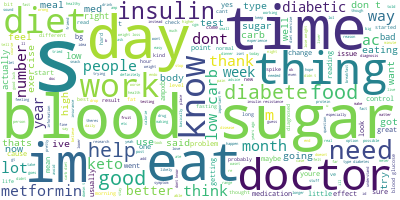

In [17]:
# Join the different processed titles together.
long_string = ','.join(list(diabetes2019['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [18]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

diabetes2019['text_tokenized'] = diabetes2019['text_processed'].apply(lambda x: tokenization(x.lower()))
diabetes2019.head(10)

<ipython-input-18-1caf0b32aeb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_tokenized'] = diabetes2019['text_processed'].apply(lambda x: tokenization(x.lower()))


Post ID           Author      Publish Date  \
0    abi6me     buttersmacks   2019-01-01 5:27   
1   ed3g2mf        SusanW100  2019-01-02 11:15   
2   ed3h251       MiguelTall  2019-01-02 11:27   
4   ed2qyr6   ketocultmember   2019-01-02 5:17   
6   ed2zhvk           adawah   2019-01-02 7:44   
7   ed34ob4  BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q      dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u  BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk         FXOjafar  2019-01-28 16:16   
11   abzyad      Fr3sh3stl4d  2019-01-02 16:50   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

                                                                                      text_gens_nonstop  \
0   Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1   I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2   Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                            This big spammy ad isn’t telling anything, either, “info.”   
6                                              That looks like days go. Anytime I 100's makes good day.   
7   Right! My timing meal insulin lately I'm working end it. Taking pictures helping. It gives proof...   
8                                                                                            Why pasta?   
9                                    Because fiance wanted I didn't feel like dirtying pan house sides.   
10            My wife same. She absolutely side. I don't eat though. A takes focus away juicy ribeye ;)   
11  Hi guys, Ever I've metformin (almost year now) feet extremely painful hypersensitive. I precious...   

                                                                                         text_processed  \
0   keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...   
1   i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...   
2   thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...   
4                                               this big spammy ad isn’t telling anything either “info”   
6                                                    that looks like days go anytime i s makes good day   
7   right my timing meal insulin lately im working end it taking pictures helping it gives proof if ...   
8                                                                                             why pasta   
9                                      because fiance wanted i didnt feel like dirtying pan house sides   
10                  my wife same she absolutely side i dont eat though a takes focus away juicy ribeye    
11  hi guys ever ive metfor

In [19]:
#remove nlk stopwords
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also',"don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'lol', 'youre', 'youll', 'doesnt'])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#remove nlk stopwords
def remove_nlk_stopwords(text):
    text = [word for word in text if word not in stopword]
    print(text)
    return text
    
diabetes2019['text_nlk_nonstop'] = diabetes2019['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))
diabetes2019.head(10)

['keto', 'stressed', 'diabetic', 'cannot', 'risk', 'higher', 'sugars', 'cdiff', 'crohns', 'doc', 'wants', 'dry', 'ldn', 'anyone', 'try', 'issues', 'experience']
['manged', 'bring', 'blood', 'sugar', 'levels', 'normal', 'range', 'time', 'managed', 'weeks', 'diabetic', 'years', 'tried', 'everything', 'finally', 'program', 'finally', 'ble', 'bring', 'sugar', 'levels', 'best', 'feeling', 'better', 'kids', 'quality', 'time', 'doctor', 'cut', 'insulin', 'dosage', 'took', 'metomorfin', 'stunned', 'program', 'thankful']
['thanks', 'susan', 'board', 'gone', 'libre', 'blood', 'sugar', 'program', 'blessing', 'program', 'body', 'start', 'deteriote', 'actually', 'able', 'weeks', 'bring', 'numbers', 'ss', 'amazed', 'time', 'tool', 'detect', 'whoch', 'foods', 'avoid', 'tools', 'help', 'well', 'advice', 'wait', 'till', 'late', 'diabetes', 'deadly', 'disease', 'spin', 'control', 'fast']
['big', 'spammy', 'ad', 'telling', 'anything', 'either', 'info', '']
['looks', 'days', 'go', 'anytime', 'makes', 'goo

['use', 'hands', 'test', 'use', 'different', 'finger', 'sore', 'test', 'right', 'tip', 'finger', 'adjusted', 'sticker', 'set', 'high', 'smallest', 'setting', 'goes', 'need', 'deep', 'draw', 'drop', 'youve', 'left', 'thats', 'probably', 'hurting', 'sure', 'change', 'sticker', 'needles', 'test', 'insures', 'clean', 'read', 'drop', 'dull', 'needle', 'hurt', 'mother', 'fucker', 'tiny', 'jagged', 'edges', 'repeated', 'use', 'far', 'years', 'tense', 'anymore', 'comes', 'said', 'earlier', 'data', 'frequent', 'testing', 'better', 'start', 'foods', 'exercises', 'effect', 'blood', 'sugar', 'cgm', 'easier', 'probably', 'finished', 'year', 'half', 'worth', 'dialysis', 'simply', 'want', 'protruding', 'body', 'right']
['mine', 'started', 'bumped', 'depth', 'need', 'change', 'time', 'prick', 'sides', 'trying', 'avoid', 'visible', 'holes', 'skin', 'dark', 'spots', 'seem', 'getting', 'blood', 'pooling', 'well', 'reason', 'completely', 'understandable', 'think', 'camp', 'shoes']
['means', 'gmc', 'benefi

['concerned', 'prediabetic', 'undiagnosed', 'type', 'starting', 'synonymous', 'symptoms', 'increased', 'thirst', 'vision', 'changes', 'going', 'pee', 'past', 'week', 'mouth', 'lips', 'incredibly', 'dry', 'slept', 'mouth', 'open', 'despite', 'drinking', 'litre', 'water', 'day', 'drink', 'water', 'drinking', 'water', 'helping', 'thirst', 'dry', 'feeling', 'petrified', 'diabetic', 'putting', 'going', 'doctor', 'recently', 'got', 'diagnosed', 'pcos', 'know', 'risk', 'factor', 'diabetes', 'major', 'exercise', 'walk', 'uni', 'mins', 'day', 'eat', 'lot', 'pasta', 'want', 'reduce', 'carb', 'intake', 'hate', 'fish', 'eggs', 'recommended', 'diabetics', 'depression', 'gad', 'ridiculously', 'low', 'selfcontrolwillpower', 'comes', 'restricting', 'eating', 'spending', 'habits', 'wouldnt', 'able', 'afford', 'medication', 'prescribed', 'know', 'checked', 'know', 'turned', 'diabetes', 'terrified', 'entire', 'life', 'advice', 'thatd', 'great', 'want', 'think', 'brave', 'able', 'manage', 'condition', 'st

['know', 'diagnosed', 'years', 'ago', 'lucky', 'variety', 'response', 'lifestyle', 'interventions', 'good', 'wellcontrolled', 'meds', 'honestly', 'pernicious', 'anemia', 'heart', 'murmur', 'piddly', 'afflictions', 'feel', 'health', 'improved', 'immensely', 'changed', 'diet', 'started', 'exercising', 'started', 'path', 'years', 'ago', 'probably', 'feel', 'better', 'today', 'honestly', 'think', 'poor', 'health']
['well', 'consider', 'healthiest', 'person', 'planet', 'trying', 'denigrate', 'diabetics', 'saying', 'considering', 'fasting', 'probably', 'want', 'health', 'problems', 'including', 'diabetes', 'fasting', 'recommended', 'sorts', 'people', 'pregnant', 'women', 'shouldnt', 'fast', 'growing', 'children', 'fast', 'people', 'health', 'issues', 'diabetes', 'probably', 'shouldnt', 'fast', 'fasting', 'stressful', 'body', 'good', 'health', 'attempting']
['sort', 'sounds', 'denigrating', 'diabetics', 'think', 'works', 'others', 'think', 'likely', 'diet', 'appropriate', 'humans', 'aware', '

['wear', 'dr', 'scholls', 'advanced', 'relief', 'socks', 'theyre', 'amazon', 'target', 'pharmacy', 'section', 'thick', 'soft', 'comfortable', 'leave', 'imprints', 'legs', 'flimsy']
['itching', 'happen', 'shoes']
['yes', 'wearing', 'shoes', 'theres', 'problem', 'told', 'coworker', 'jokingly', 'recommended', 'sleeping', 'shoes', 'curious', 'compression', 'socks', 'help']
['actually', 'lymphedema', 'addition', 'diabetes', 'happened', 'time', 'diagnosed', 'issued', 'prescription', 'compression', 'stockings', 'basically', 'foot', 'tried', 'swell', 'stopped', 'shoe', 'sure', 'process', 'going', 'probably', 'capillaries', 'longer', 'restricted', 'causing', 'itching', 'itching', 'drove', 'mad', 'buy', 'menthol', 'gel', 'rub', 'tops', 'feet', 'help', 'itching', 'ice', 'help', 'incidences', 'happening', 'lot', 'pretty', 'summer', 'months', 'heat', 'drives', 'lymphedema', 'nuts']
['dad', 'type', 'diabetic', 'man', 'eat', 'leave', 'food', 'ready', 'needs', 'heat', 'claims', 'hungry', 'even', 'home

['read', 'post', 'away', 'lot', 'concerns', 'posted', 'mine', 'thanks', 'sharing']
['common', 'headaches', 'withdrawal', 'symptoms', 'cut', 'carbs', 'try', 'drinking', 'lots', 'water', 'substantially', 'increasing', 'salt', 'intake', 'bad', 'symptoms', 'away', 'weeks', 'plus', 'rketo', 'folks', 'addressed', 'problem', 'successfully', 'thread', 'hostility', 'cutting', 'carbs', 'clear', 'preference', 'medication', 'path', 'however', 'best', 'wishes']
['approach', 'eat', 'meter', 'words', 'anytime', 'ik', 'try', 'new', 'food', 'testing', 'sequence', 'results', 'met', 'criteria', 'staying', 'range', 'worked', 'ended', 'gramscarbs', 'day', 'think', 'different', 'lot', 'variations', 'theme', 'appropriate', 'solutions', 'keto', 'work', 'great', 'achieved', 'goal', 'going', 'low', 'carb', 'people', 'achieve', 'goal', 'going', 'low', 'carb', 'make', 'choices', 'research']
['feel', 'idiot', 'let', 'anybody', 'undermine', 'self', 'worth', 'doctors', 'kinda', 'lazy', 'want', 'effort', 'patients', 

['overate', 'carbs', 'diagnosed', 'obese', 'sedantry', 'diagnosed', 'honestly', 'way', 'diagnosed', 'mean']
['bot', 'bleep', 'bloop', 'someone', 'linked', 'thread', 'place', 'reddit', 'rnutrition', 'question']
['obese', 'sedentary', 'trying', 'think', 'eats', 'carbs', 'processed', 'food', 'many', 'talking', 'autoimmune', 'disease', 'people', 'overeaten', 'carbs', 'actually']
['high', 'carb', 'diet']
['talking', 'eat']
['simplified', 'dm', 'type', 'caused', 'things', 'beta', 'cells', 'run', 'capacity', 'genetical', 'beta', 'cells', 'handle', 'europeans', 'gt', 'polynesians', 'example', 'second', 'thing', 'tissues', 'getting', 'resistant', 'insulin', 'example', 'methformine', 'works', 'insuline', 'resistance', 'getting', 'insuline', 'beta', 'cells', 'cells', 'handle', 'fail', 'tissues', 'resistant', 'happens', 'complex', 'fully', 'figured', 'saying', 'dm', 'ii', 'caused', 'carbs', 'waaaaaay', 'simplistic', 'wrong', 'sedentary', 'obese', 'low', 'carb', 'diet', 'mean', 'dm', 'ii']
['think'

['thanks', 'advice', 'took', 'shot', 'yesterday', 'wiggled', 'pen', 'seconds', 'gotten', 'tiny', 'drop', 'great', 'far', 'great', 'drug', 'despite', 'controlling', 'bg', 'glipizide', 'impossible', 'lose', 'weight', 'regardless', 'eating', 'bg', 'great', 'lost', 'noticeable', 'weight']
['diagnosed', 'td', 'october', 'ac', 'average', 'glucose', 'today', 'ac', 'average', 'glucose', 'cholesterol', 'high', 'work', 'although', 'diabetes', 'numbers', 'looking', 'good', 'started', 'experiencing', 'neuropothy', 'sleeping', 'hands', 'arms', 'dr', 'monday', 'discuss']
['ac']
['congrats', 'keto', 'fasting', 'works', 'wonders', 'insulin', 'resistance', 'neuropathy', 'heal', 'time', 'years', 'long', 'glucose']
['strive', 'follow', 'keto', 'diet', 'reality', 'following', 'low', 'carb', 'diet', 'previously', 'ate', 'carb', 'heavy', 'junk', 'began', 'increasing', 'activity', 'levels', 'recently', 'started', 'strength', 'training']
['thank', 'hope', 'bit', 'bummed', 'week']
['keep', 'head', 'lot', 'bett

['measure', 'hour', 'meal', 'tell', 'shooting', 'totally', 'unacceptable', 'amounts', 'focus', 'specific', 'food', 'causing', 'instance', 'totally', 'acceptable', 'bg', 'hours', 'drinking', 'juice', 'however', 'hour', 'high', 'compared', 'foods', 'thats', 'eye', 'opener', 'smaller', 'aounts', 'combine', 'foods', 'simply', 'without', 'high', 'fiber', 'foods', 'slow', 'reaction', 'result', 'spike', 'instance', 'thought', 'popcorn', 'affected', 'bg', 'test', 'hour', 'hours', 'bg', 'slightly', 'elevated', 'since', 'got', 'cgm', 'rise', 'start', 'hours', 'started', 'eating', 'one', 'time', 'hours', 'later']
['tested', 'lot', 'diagnosed', 'reason', 'testing', 'hour', 'hours', 'determine', 'foods', 'cause', 'blood', 'suger', 'levels', 'spike', 'foods', 'break', 'quickly', 'missed', 'hour', 'mark', 'break', 'slowly', 'read', 'advocate', 'testing', 'hour', 'mark', 'personally', 'think', 'cgm', 'devices', 'standard', 'first', 'help', 'recently', 'diagnosed', 'figure', 'foods', 'ok', 'eat', 'tat'

['researched', 'though', 'heres', 'discovered', 'makes', 'big', 'deal', 'use', 'handle', 'needle', 'uses', 'needles', 'standard', 'insulin', 'pen', 'hides', 'needle', 'squeamish', 'people', 'freak', 'seeing', 'needle', 'subcutaneous', 'injection', 'though', 'insulin', 'pen', 'week', 'insulin', 'drug', 'enhances', 'ones', 'insulin', 'production', 'individuals', 'extremely', 'poor', 'insulin', 'production', 'severe', 'type', 'iis', 'sufficiently', 'increase', 'insulin', 'production', 'regular', 'insulin', 'injections', 'required', 'neat', 'idea', 'looks', 'injection', 'version', 'glipizide', 'pill']
['years', 'painfully', 'works', 'fine']
['thats', 'wonderful', 'works', 'sorry', 'painful', 'taking', 'insulin', 'needles']
['needle', 'spring', 'powered', 'feel', 'knife', 'belly', 'seconds']
['oh', 'wow', 'thats', 'awful', 'guillotine', 'something', 'hate', 'blood', 'tests', 'springloaded', 'lancet', 'device', 'problem', 'normal', 'insulin', 'pen', 'ultrafine', 'needles', 'though', 'mm', 'l

['annual', 'bloodwork', 'week', 'called', 'tell', 'ac', 'devastated', 'entire', 'life', 'marked', 'shitty', 'health', 'conditions', 'ulcerative', 'colitis', 'endometrios', 'neurofibromatosis', 'sciatica', 'scads', 'mental', 'illness', 'anemia', 'justpissed', 'diet', 'great', 'fucking', 'hate', 'exercise', 'seemsunfair', 'diet', 'going', 'nightmare', 'cant', 'eat', 'lot', 'healthy', 'foods', 'nuts', 'seeds', 'raw', 'vegetables', 'thats', 'roughage', 'bc', 'colon', 'exercise', 'blows', 'face', 'anemia', 'keeps', 'pretty', 'tired', 'time', 'sciatica', 'fucks', 'whining', 'lot', 'guys', 'feel', 'happened', 'lithium', 'know', 'thats', 'riski', 'appreciate', 'advice', 'support', 'thanks']
['unfair', 'felt', 'brother', 'came', 'hospital', 'diagnosis', 'came', 'couldnt', 'eat', 'weeks', 'vomitted', 'went', 'hospital', 'diagnosed', 'dka', 'complications', 'happens']
['thanks', 'crazy', 'making', 'thing', 'symptoms', 'explained', 'disorders', 'answers', 'questions']
['advice', 'exercise', 'prett

['doctor', 'sono', 'promises', 'right', 'said', 'heres', 'understanding', 'based', 'extensive', 'family', 'history', 'little', 'bit', 'google', 'research', 'diabetes', 'affect', 'organ', 'body', 'including', 'brain', 'extreme', 'highs', 'extreme', 'lows', 'acute', 'cognitive', 'effects', 'time', 'cumulative', 'damage', 'honestly', 'worry', 'losing', 'toes', 'losing', 'mind']
['years', 'ago', 'going', 'breakup', 'long', 'term', 'emotionally', 'abusive', 'relationship', 'blood', 'sugar', 'numbers', 'wild', 'high', 'low', 'spiked', 'crashed', 'noticed', 'long', 'term', 'memories', 'disappeared', 'finally', 'left', 'sugars', 'returned', 'normal', 'memories', 'back', 'huge', 'holes', 'childhood', 'gone', 'realize', 'likely', 'stress', 'depression', 'caused', 'levels', 'spikecrash']
['feel', 'ya', 'going', 'similar', 'vertigo', 'doctors', 'help', 'far']
['frustrated', 'scared', 'know', 'feeling', 'cant']
['got', 'colonoscopy', 'wednesday', 'morning', 'tuesday', 'ill', 'nosolidfood', 'clearli

['completely', 'understand', 'bipolar', 'frequently', 'depressed', 'causes', 'sedentary', 'well', 'especially', 'mainly', 'want', 'sleep', 'day', 'understand', 'anxiety', 'health', 'sounds', 'good', 'healthother', 'depression', 'hopefully', 'getting', 'getting', 'little', 'exercise', 'help', 'feel', 'better', 'mentally', 'physically', 'wish', 'best', '']
['sorry', 'remember']
['thank', 'kind', 'words', 'friend']
['youve', 'got', 'careful', 'lot', 'studies', 'low', 'quality', 'goal', 'based', 'heavily', 'cherry', 'picked', 'epidemiology', 'sponsored', 'th', 'day', 'adventist', 'church', 'order', 'vegan']
['love', 'numbers', 'prediabetic', 'based', 'anyone', 'family', 'diabetes', 'reason', 'concerned', 'point']
['advocating', 'going', 'vegan', 'study', 'plenty', 'evidence', 'fruits', 'vegetables', 'important', 'health', 'though']
['makes', 'important', 'though', 'need', 'fibre', 'nutrient', 'need', 'animal', 'products', 'occasional', 'plants', 'cause', 'problems', 'often']
['provide', 'v

['whats', 'roof', 'soon', 'eating', 'testing', 'think', 'test', 'soon', 'often', 'test', 'recommended', 'track', 'honest', 'honestly', 'think', 'recommend', 'sensors', 'ts', 'insulin', 'ate', 'bowl', 'oatmeal', 'went', 'ok', 'whats', 'number', 'hours', 'later', 'thats', 'ok', 'eat', 'hours', 'later', 'thats', 'great', 'yes', 'ts', 'bolos', 'numbers', 'low', 'option', 'thats', 'target', 'numbers', 'higher', 'recommending', 'nuts', 'enjoy', 'stack', 'pancakes', 'mourning', 'going', 'extreme', 'imo', 'better']
['spike', 'points', 'bad', 'bg', 'bad', 'pre', 'meal', 'eat', 'bowl', 'grain', 'rice', 'beans', 'jumps', 'tells', 'rice', 'beans', 'bad', 'bean', 'dip', 'veggies', 'day', 'bg', 'barely', 'moved', 'know', 'rice', 'beans', 'glad', 'able', 'eat', 'eat', 'cant', 'eat', 'determining', 'testing', 'foods', 'eat', 'avoiding', 'lowered', 'ac', 'ill', 'stand', 'way', 'eat', 'figured', 'results', 'doctor', 'loves', 'results', 'wants', 'listen']
['bad', 'heard', 'damage', 'start', 'sure', 'dama

['trying', 'convince', 'merely', 'eat', 'low', 'carb', 'life', 'starting', 'transition', 'easier', 'live', 'hunger']
['gave', 'bread', 'sweets', 'eat', 'eggs', 'meats', 'salads', 'oil', 'n', 'vinegar', 'type', 'dressings', 'burgers', 'buns', 'use', 'fitness', 'pal', 'track', 'meals', 'pod', 'buy', 'loaf', 'bread', 'often']
['think', 'thanks']
['oh', 'got', 'trying', 'point', 'agree', 'correct', 'willing', 'able', 'point', 'think', '']
['thats', 'great', 'start', 'case', 'know', 'need', 'rid', 'rice', 'potatoes', 'pasta', 'tortillas', 'sounds', 'pretty', 'good', 'right', 'guessing', 'time', 'metformin', 'secondary', 'idea', 'lot', 'people', 'claim', 'cinnamon', 'capsules', 'help', 'blood', 'sugar', 'called', 'bitter', 'melon', 'decided', 'start', 'taking', 'cinnamon', 'caps', 'makes', 'difference', 'cant', 'bitter', 'melon', 'locally', 'worth', 'far', 'cinnamon', 'bs', 'numbers', 'havent', 'changed', 'different', 'react', 'different', 'things', 'differently', 'maybe', 'thats', 'idea', '

['shockerall', 'kid', 'cereals', 'basically', 'colored', 'shaped', 'sugar']
['hitting', 'actually', 'means', 'okay']
['argh', 'come', 'nowhere', 'watching', 'enjoying', 'hulu', 'series', 'four', 'weddings', 'funeral', 'characters', 'dad', 'diabetic', 'overweight', 'manage', 'illness', 'eats', 'sweets', 'likes', 'know', 'pop', 'culture', 'code', 'type', 'course', 'ends', 'hospitalised', 'refuses', 'care', 'adult', 'son', 'stay', 'living', 'home', 'stay', 'paying', 'unfulfilling', 'job', 'support', 'tonight', 'episode', 'telling', 'says', 'turns', 'year', 'old', 'diabetic', 'cake', 'based', 'diet', 'quips', 'know', 'described', 'america', 'number', 'one', 'ugh', 'media', 'pop', 'culture', 'gluttonous', 'lazy', 'burdens']
['diabetics', 'taking', 'care', 'big', 'reason', 'doctors', 'approach', 'patients', 'babystep', 'suggestions', 'eat', 'hardly', 'carbs', 'regular', 'exercise', 'offdaysweeksmonths', 'whole', 'people', 'care', 'diabetes', 'people', 'people', 'good', 'days', 'meals', 'toss

['educator', 'agree', 'commenters', 'saying', 'indepth', 'testing', 'rule', 'sounds', 'risk', 'factors', 'sure', 'diagnosed', 'young', 'adultsteens', 'common', 'especially', 'strong', 'genetic', 'history', 'risk', 'factors', 'obesity', 'even', 'true', 'age', 'advocate', 'referral', 'endocrinologist']
['need', 'bloodwork', 'extremely', 'unusual', 'underweight', 'yo', 'type', 'diabetes']
['likely', 'beginning', 'type', 'diabetes', 'age', 'ask', 'referral', 'endocrinologist', 'test', 'type', 'specific', 'antibodies']
['peanuts', 'unsalted', 'walnuts', 'sunflower', 'seeds', 'occasional', 'hotdog', 'pork', 'rindsmain', 'things', 'animal', 'proteinprotein', 'minimizedthe', 'low', 'insulin', 'index', 'diet', 'vodkaand', 'days', 'diabetest', 'symptoms', 'gone', 'awayno', 'crotch', 'fungus', 'means', 'blood', 'sugar', 'normalwell', 'high', 'normal']
['wait', 'crotch', 'fungus', 'thought', 'normal', 'sack', 'itch']
['sack', 'entire', 'crotch', 'area', 'buttcrackvery', 'common', 'diabetics', 'pre

['threw', 'away', 'diabetes', 'medication', 'going', 'keto', 'intermitten', 'fasting', 'metformin', 'statins', 'etc', 'believe', 'stopped', 'progression', 'burningnumbness', 'leg', 'months', 'eating', 'way', 'read', 'diabetes', 'code', 'dr', 'fung', 'sleep', 'night', 'pain', 'sleeping', 'pill', 'gabapentin']
['yes', 'easy']
['taking', 'gabapentin', 'years', 'neuropathy', 'hot', 'flashes', 'sleep', 'experienced', 'effectsi', 'mgs', 'dayand', 'amazing', 'nerve', 'pain', 'every', 'drug', 'potential', 'effects', 'experience', 'know', 'people', 'different', 'thingsa', 'friend', 'child', 'seizures', 'friend', 'ms', 'takes', 'friends', 'brother', 'neuropathy', 'neighbor', 'takes', 'insomnia', 'niece', 'taken', 'mood', 'stabilizer', 'experienced', 'negative', 'effects', 'drowsy', 'helpful', 'insomnia', 'took', 'weeks', 'adjust', 'feel', 'sleepy', 'start', 'taking', 'morningfor', 'hot', 'flashes']
['excellent', 'medication', 'currently', 'use', 'mood', 'stabilizer', 'neuropathy', 'sleep', 'hot'

['', 'female', 'lbs', 'time', 'high', 'blood', 'glucose', 'reading', 'lbs', 'great', 'hear', 'diagnosis', 'blessing', 'disguise', 'feel', 'kick', 'ass', 'need', 'health', 'check']
['wow', 'interesting', 'definitely', 'look', 'getting', 'meter', 'totally', 'monitoring', 'things', 'real', 'time', 'connect', 'game', 'changer', 'psychologically']
['reference', 'easily', 'fasting', 'blood', 'sugar', 'normal', 'levels', 'weeks', 'low', 'carb', 'coupling', 'low', 'carb', 'intermittent', 'fasting', 'creates', 'weight', 'loss', 'sweet', 'spot', 'turning', 'body', 'sugar', 'burner', 'fat', 'burner', 'jason', 'fung', 'youtube', 'good', 'good', 'books', 'diabetes', 'code', 'one', 'good', 'book', 'eat', 'rich', 'live', 'long', 'touts', 'low', 'carb', 'lifestyle', 'starting', 'bmi', 'target', 'lbs', 'easily', 'months', 'waiting', 'buy', 'new', 'clothes', 'good', 'luck', 'easily', 'manageable', 'numbers', 'cusp', 'sort', 'got', 'lucky', 'getting', 'news', 'late', 'game']
['intolerance', 'think', 'bet

['lot', 'td', 'peers', 'given', 'good', 'advice', 'share', 'tips', 'exercise', 'best', 'friend', 'min', 'fast', 'walking', 'makes', 'difference', 'need', 'burn', 'meds', 'help', 'fond', 'meds', 'fix', 'thing', 'screw', 'another', 'instance', 'metformin', 'gives', 'gastritis', 'best', 'bet', 'cut', 'carbs', 'dramatically', 'takes', 'getting', 'depressed', 'especially', 'cheat', 'idea', 'disciplined', 'manage', 'td', 'wtih', 'diet', 'exercise', 'imho', 'best', 'combo', 'keto', 'low', 'carb', 'exercise', 'need', 'meds', 'promise']
['new', 'educator', 'met', 'said', 'grams', 'carbs', 'meal', 'limits', 'snacks', 'g']
['great', 'advice', 'thank', 'hoping', 'control', 'soon', 'dealing', 'new', 'lifestyle', 'opened', 'eyes', 'carb', 'heavy', 'diet', 'trying', 'sucked', 'depression', 'tough', 'looking', 'forward', 'kicking', 'beetus', 'butt', 'going', 'follow', 'advice', 'check', 'blood', 'sugar', 'fist', 'thing', 'meals', 'thanks']
['thank', 'new', 'lifestyle', 'kind', 'victories', 'struggles'

['nonmedicalprofessional', 'opinion', 'works', 'mornings', 'low', 'felt', 'perfectly', 'fine', 'granted', 'time', 'hit', 'freaked', 'hell', 'compensated', 'ended', 'felt', 'shit', 'day', 'know', 'better', 'bother', 'current', 'day', 'average', 'according', 'meter', 'feb', 'st', 'ac', 'started', 'metformin', 'twice', 'day', 'cut', 'carbs', 'liek', 'crazy', 'person', 'ac', 'cut', 'metformin', 'half', 'pill', 'twice', 'day', 'ac', 'good', 'enough', 'probably', 'going', 'drop', 'metformin', 'day', 'heres', 'thing', 'diabetes', 'life', 'long', 'disease', 'diabetic', 'forever', 'marathon', 'sprint', 'points', 'rushing', 'cut', 'meds', 'ready', 'getting', 'meds', 'helping', 'ready', 'deal', 'cause', 'massive', 'set', 'land', 'meds', 'opinion', 'better', 'time', 'step', 'step', 'baby', 'step', 'land', 'safely', 'goal', 'stay', 'way', 'look', 'good', 'low', 'high', 'adjust', 'carbs', 'fit', 'need', 'way', 'come', 'metformin', 'ill', 'know', 'compensate', 'effort', 'able', 'avoid', 'ketosis', 'h

['meat', 'cheese', 'eggs', 'carbs']
['soup', 'variation', 'cut', 'sausages', 'egg', 'slicer', 'add', 'reducedsodium', 'bouillon', 'cube']
['love', 'ds', 'eat', 'cancer', 'causing', 'processed', 'meat', 'want', 'oooo', 'beware', 'carbs']
['great', 'job', 'thats', 'awesome']
['thank', 'pleased', 'doc', 'expected', 'sixes']
['well', 'killed', 'friend', 'proud', 'keep', 'keeping']
['thank', 'certainly', 'pretty', 'scared', 'felt', 'dying', 'worse', 'meds']
['congratulations', 'success', 'diet', 'exercise', 'regime', 'following', 'well']
['diet', 'exercise', 'walking', 'long', 'distances', 'daily', 'simply', 'live', 'queens', 'work', 'manhattan', 'look', 'posts', 'detailed', 'diet', 'short', 'version', 'pasture', 'raised', 'eggswhole', 'avocado', 'breakfast', 'tblspn', 'extra', 'virgin', 'olive', 'oil', 'lunch', 'amp', 'dinner', 'meat', 'fish', 'want', 'cooked', 'basic', 'salt', 'pepper', 'maybe', 'squeeze', 'lemon', 'kalespinach', 'salad', 'tblspn', 'extra', 'virgin', 'olive', 'oil', 'teas

['needed', 'rice', 'rest', 'ice', 'compress', 'elevate', 'bruise', 'long', 'obstructing', 'gait', 'ice', 'elevate']
['elevate', 'foot']
['recommendation', 'heart', 'basically', 'lying', 'pillow', 'foot', 'work', 'chair', 'desk', 'helped', 'bit', 'gravity', 'making', 'blood', 'fluids', 'pool', 'foot']
['context', 'foot', 'injury', 'warning', 'concerned', 'based', 'long', 'diabetic', 'time', 'control', 'high', 'blood', 'glucose', 'levels', 'extended', 'period', 'time', 'starts', 'damaging', 'nerve', 'endings', 'usually', 'starting', 'extremities', 'nerve', 'endings', 'experience', 'damage', 'detect', 'wounds', 'properly', 'leading', 'body', 'healing', 'properly', 'leads', 'terrible', 'infections', 'bad', 'situations', 'amputations', 'commentator', 'said', 'iced', 'elevated', 'eye', 'hope', 'helps']
['helpful', 'info', 'bgl', 'control', 'insulin', 'stress', 'much', 'op', 'controlling', 'type', 'ii']
['massaging', 'help']
['tell', 'little', 'bruise', 'u', 'feel', 'toes', 'feet', 'toes', 'n

['suggest', 'keeping', 'case', 'libre', 'well', 'times', 'sensor', 'inaccurate', 'finger', 'stick', 'frequently', 'happened', 'fyi', 'abbott', 'replace', 'sensors', 'extremely', 'inaccurate']
['abbott', 'strips', 'need', 'verio', 'given', 'verio', 'reader', 'away', 'use', 'libre', 'guide', 'diet', 'exact', 'number', 'important', 'sure', 'blood', 'sugar', 'firmly', 'normal', 'ac']
['dark', 'gums', 'extremely', 'dry', 'skin', 'severe', 'neuropathy', 'scars', 'sores', 'sound', 'diabetes']
['tell', 'tale', 'signs', 'excessive', 'night', 'time', 'urination', 'extreme', 'thirst', 'think', 'dark', 'gums', 'dark', 'patches', 'skin', 'called', 'acanthosis', 'nigricans']
['gtdiabetes', 'test']
['could', 'number', 'things', 'sounds', 'similar', 'ask', 'doctor', 'testing', 'order', 'doctors']
['sounds', 'need', 'doctor', 'diabetes', 'actual', 'tests', 'know']
['nobody', 'diagnose', 'whatever', 'going', 'medical', 'professional', 'meantime', 'pick', 'glucose', 'meter', 'start', 'testing', 'bg', 'le

['ac', 'came', 'insulin', 'levels', '']
['insulin', 'resistance', 'puts', 'great', 'risk', 'chronic', 'disease', 'condition', 'insulin', 'resistant', 'years', 'decades', 'know', 'even', 'ac', 'fasting', 'glucose', 'normal', 'ok', 'insulin', 'borderline', 'years', 'blood', 'sugar', 'creeping', 'higher', 'higher', 'insulin', 'day', 'boom', 'blood', 'sugar', 'spikes', 'insulin', 'method', 'check', 'insulin', 'resistance', 'homair', 'calculator', 'need', 'fastng', 'glucose', 'times', 'fasting', 'insulin', 'go', 'thebloodcodecom']
['thank', 'advice']
['listen', 'jimmydm', 'knows', 'talking', 'fasting', 'insulin', 'level', 'high', 'indicating', 'insulin', 'resistance', 'personally', 'recommend', 'cutting', 'carbs', 'try', 'bring']
['gt', 'plus', 'twice', 'monthly', 'visits', 'registered', 'dietitian', 'pounds', 'weeks', 'worth', 'effects', 'sure', 'come', 'injections', 'safe', 'surmise', 'getting', 'diet', 'order', 'cause', 'weight', 'loss']
['drug', 'induces', 'slow', 'weight', 'loss', 'cal

['cheap', 'easy', 'keto', 'meal', 'preps']
['gtim', 'trying', 'stay', 'away', 'carbs', 'asian', 'rice', 'noodles', 'everywhere', 'additional', 'question', 'basmati', 'better', 'regular', 'mediumgrain', 'rice', 'kind', 'rice', 'forgiving', 'eat', 'noodles', 'okay', 'eat', 'grain', 'kind', 'noodles', 'better', 'choice', 'meter', 'answer', 'questions', 'test', 'peak', 'meals']
['readings', 'times', 'week', 'actually', 'skipped', 'days', 'christmas', 'wasnt', 'especially', 'bad', 'thanksgiving', 'readings', 'kept', 'coming', 'regardless', 'days', 'ago', 'half', 'months', 'ago', 'despite', 'starting', 'walk', 'mile', 'friday', 'miles', 'monday', 'exercising', 'new', 'years', 'resolution', 'slashed', 'levels', 'working', 'home', 'completely', 'sedentary', 'way', 'adding', 'read', 'much', 'taking', 'mg', 'metformin', 'day', 'exercising', 'addition', 'eating', 'better', 'level', 'went', 'points', 'though', 'slashed', 'carbs', 'hours', 'forget', 'day', 'yesterday', 'yesterday', 'carbs', 'grams'

['afternoon', 'coffee', 'bolus', 'units']
['weird', 'coffee', 'bg', 'perhaps', 'correlation', 'caffeine', 'raising', 'certain', 'hormone', 'levels', 'behavior', 'black', 'tea', 'caffeine', 'coke', 'zero']
['gthomemade', 'indian', 'curry', 'shrimp', 'broccoli', 'onion', 'carrot', 'coffee', 'splenda', 'recipe', 'curry', 'including', 'thickeners', 'carrots', 'carbs', 'trust', 'meter', 'whatever', 'recipe', 'curry', 'breakfast', 'menu', 'ok', 'times', 'day', 'help', 'test', 'review', 'adjust']
['nope', 'coffee', 'rarely', 'drink', 'water', 'lets', 'face', 'medical', 'mysteries', 'bolus', 'calculated', 'height', 'weight', 'body', 'processes', 'carbs']
['ill', 'need', 'source', 'splenda', 'sucralose', 'completely', 'carb', 'free', 'thinking', 'different', 'sweetener', 'granulated', 'splenda', 'starch', 'fillers', 'granulated', 'g', 'carbs', 'teaspoon', 'starch', 'simple', 'glucose', 'sugar', 'g', 'tsp', 'comparison']
['splendas', 'components', 'maltodextrin', 'sucralose', 'total', 'product',

['beef', 'pork', 'affect', 'blood', 'glucosewhat', 'mess', 'sugars', 'sugars', 'fruits', 'sodas', 'donuts', 'candy', 'carbsrice', 'potatoes', 'pasta', 'breadswheat', 'listed', 'us', 'government', 'diabetes', 'website', 'good', 'foods', 'common', 'american', 'diet', 'following', 'approved', 'american', 'diabetes', 'association', 'web', 'diet', 'bad', 'outdated', 'idea', 'basically', 'needs', 'cut', 'carbs', 'sugars', 'develop', 'exercise', 'program', 'stick', 'healthy', 'meats', 'good', 'fats', 'butter', 'meat', 'fat', 'lots', 'non', 'sugary', 'veggies', 'non', 'sugary', 'sweet', 'potatoes', 'carrots', 'suggest', 'check', 'doctor', 'videos', 'keto', 'diet']
['gti', 'know', 'cant', 'currently', 'beef', 'pork', 'tries', 'rein', 'numbers', 'unless', 'vegan', 'religious', 'reasons', 'allergic', 'meats', 'false', 'fact', 'carbfree', 'proteoin', 'fat', 'definitely', 'menu', 'pass', 'invitation', 'join', 'meantime', 'ask', 'read', 'click', 'getting', 'started']
['entirely', 'sure', 'broken', '

['diagnosed', 'months', 'ago', 'ac', 'caught', 'early', 'great', 'meant', 'came', 'totally', 'blue', 'true', 'first', 'sucks', 'big', 'lifestyle', 'change', 'okay', 'frustrated', 'discouraged', 'probably', 'gonna', 'feel', 'shit', 'weeks', 'amazed', 'better', 'feel', 'sugars', 'normal', 'range', 'meter', 'asap', 'test', 'mornings', 'hour', 'meals', 'read', 'meter', 'cut', 'foods', 'spike', 'okay', 'try', 'change', 'entire', 'lifestyle', 'overnight', 'gonna', 'frustrated', 'gotta', 'progress', 'change', 'habits', 'little', 'little', 'ac', 'terrible', 'shape', 'metformin', 'diet', 'exercise', 'seeing', 'great', 'bg', 'numbers', 'week', 'two', 'need', 'anything', 'feel', 'free', 'reach', 'sub', 'lt']
['thank', 'sharing', 'story']
['thank', 'great', 'resource']
['going', 'second', 'opinion', 'need', 'keto', 'cut', 'substitute', 'major', 'sources', 'carbs', 'regular', 'meals', 'piece', 'chocolate', 'wholemeal', 'bread', 'roll', 'going', 'kill', 'eating', 'bread', 'potatoes', 'rice', 'pasta'

['roughly', 'grams', 'carbs', 'sugar', 'ingredient', 'use', 'provide', 'nutrients', 'hoping', 'apple', 'comparison', 'regular', 'pepsi', 'grams', 'sugar']
['use', 'unsweetened', 'almond', 'milk', 'mine']
['smoothie', 'table', 'spoons', 'peanut', 'butter', 'banana', 'milk', 'g', 'carbs', 'filling', 'sure', 'insulin', 'dispensed', 'drinking']
['diabetics', 'typically', 'anything', 'restrictions', 'placed', 'long', 'insulinwork', 'well']
['thought', 'g', 'carb', 'direct', 'equivalent', 'g', 'sugar']
['mean', 'insulin', 'eating']
['errm', 'good', 'advise', 'mean', 'anything']
['yes', 'high', 'sugar', 'food', 'longer', 'eating', 'high', 'school', 'foods', 'raise', 'blood', 'levels', 'quick']
['essentially', 'want', 'work', 'correctly', 'crazy', 'sugar', 'something']
['necessarily', 'fiber', 'stuff', 'certain', 'level', 'carbs', 'sugar', 'turned', 'glucose', 'digestive', 'system', 'glucose', 'needs', 'processed', 'somehow', 'hard', 'let', 'old', 'food', 'pyramid', 'fruits', 'vegetables', 'he

['exercise', 'needs', 'experiment', 'best', 'way', 'control', 'blood', 'sugar', 'levels', 'said', 'factors', 'contribute', 'exercise', 'equation', 'including', 'blood', 'sugar', 'time', 'medication', 'time', 'day', 'diet', 'stress', 'others', 'company', 'specializes', 'exercise', 'people', 'diabetes', 'ask', 'time', 'day', 'experience', 'morning']
['gtmy', 'sugar', 'sky', 'rockets', 'long', 'eating', 'exercise', 'balance', 'eat', 'excessive', 'carbs', 'high', 'gtmgdl', 'mmoll', 'exercise', 'exacerbate', 'send', 'higher', 'eat', 'appropriately', 'begin', 'exercise', 'meal', 'time', 'releasing', 'glycogen', 'energy', 'body', 'sense', 'energy', 'loss', 'release', 'compensate', 'trick', 'add', 'small', 'carby', 'snack', 'prior', 'exercise', 'previous', 'meal', 'test', 'exercise', 'small', 'snack', 'needed']
['depends', 'exercising', 'high', 'blood', 'sugar', 'stay', 'high']
['gone', 'wellness', 'program', 'treat', 'prediabetes', 'help', 'drawbacks']
['maybe', 'help', 'think', 'help']
['par

['know', 'obesity', 'genetic', 'right', 'saying', 'diet', 'lifestyle', 'causes', 'huge', 'issue', 'things', 'trigger', 'gene', 'expressions', 'things', 'root', 'yeah', 'course', 'present', 'sources', 'attempting', 'argue', 'prove', 'wrong', 'discussion', 'think', 'right', 'view', 'cold', 'hard', 'fact', 'biology', 'geek', 'fully', 'believe', 'science', 'far', 'intuition', 'disagree']
['starting', 'diabetes', 'territory', 'recommend', 'getting', 'freestyle', 'libre', 'continuous', 'glucose', 'monitor', 'thing', 'easier', 'blood', 'sugar', 'range', 'compliant', 'finger', 'sticking']
['kcko', 'thought', 'got', 'diagnosed', 'decided', 'ill', 'kids', 'ac', 'health', 'know', 'cant', 'away', 'eating', 'shit', 'keto', 'world', 'difference']
['sure', 'sounds', 'could']
['gets', 'better', 'bro']
['diabetes', 'type', 'genetic', 'component', 'cant', 'gave', 'diabetes']
['think', 'feeling', 'better', 'home', 'realize', 'better', 'dying', 'anymore', 'seriously', 'diabetes', 'sucks', 'manageable', 'd

['lost', 'options', 'trying', 'diet', 'look', 'different', 'information', 'doctor', 'wants', 'tests', 'want', 'start', 'treatment', 'yet', 'looking', 'advice', 'next', 'started', 'believe', 'making', 'symptoms', 'performance', 'work', 'dropped', 'kinda', 'relieved', 'know', 'head', 'tired', 'time', 'thanks', 'time', 'read']
['recently', 'diagnosed', 'type', 'know', 'exactly', 'mean', 'conflicting', 'information', 'days', 'heard', 'doctors', 'glycemic', 'index', 'way', 'go', 'ada', 'touting', 'old', 'lowfat', 'diet', 'know', 'eat', 'bananas', 'gi', 'says', 'yes', 'ada', 'says', 'fruit', 'gi', 'says', 'yes', 'ada', 'says', 'pasta', 'ada', 'says', 'yes', 'gi', 'says', 'makes', 'want', 'eat', 'cake', 'sure', 'hyperinsulinemia', 'guess', 'waaay', 'little', 'insulin', 'mixture', 'insulin', 'blood', 'anemia']
['body', 'respond', 'insulin', 'makes', 'careful', 'lead', 'blown', 'type', 'thanks', 'info']
['body', 'processes', 'food', 'matters', 'testing', 'blood', 'sugar', 'hours', 'eat', 'tell'

['recommend', 'getting', 'freestyle', 'libre', 'cgm', 'super', 'helpful', 'foods', 'real', 'time', 'finger', 'sticks', 'yay', 'helpful', 'thing', 'learned', 'start', 'day', 'protein', 'eggs', 'low', 'carb', 'protein', 'shakes', 'cottage', 'cheese', 'etc', 'help', 'buffer', 'rest', 'day', 'worst', 'thing', 'carb', 'breakfast', 'pancakes', 'loooooong', 'time', 'hope', 'early', 'diabetic', 'recently', 'able', 'stop', 'metformin', 'following', 'week', 'blood', 'sugar', 'diet', 'careful', 'eat', 'control', 'meds', 'use', 'cgm', 'close', 'eye', 'things', 'good', 'luck', 'feel', 'free', 'pm', 'questions', 'anything']
['sweet', 'tldr', 'actually', 'lose', 'sweetness', 'change', 'perspective', 'case', 'diet', 'soda', 'plays', 'havoc', 'gut', 'touch', 'anymore', 'drink', 'actually', 'satisfy', 'sweet', 'tooth', 'left', 'calibrated', 'wanting', 'sweet', 'things', 'high', 'quantity', 'reducing', 'quantity', 'sweet', 'things', 'consume', 'recalibrate', 'sweet', 'tooth', 'single', 'strawberry', 'tas

['insurance', 'actually', 'best', 'buti', 'sure', 'different', 'options', 'open', 'enrollment', 'want', 'look', 'types', 'offered', 'care', 'ampxb', 'doctors', 'er', 'urgicares', 'testing', 'durable', 'supplies', 'text', 'strips', 'ampxb', 'friend', 'similar', 'money', 'certain', 'things', 'doctor', 'goes', 'er', 'ampxb', 'mine', 'doctors', 'local', 'hospitals', 'ers', 'urgicares', 'downside', 'day', 'supply', 'meds', 'mail', 'order', 'day', 'month', 'script', 'day']
['update', 'got', 'new', 'doctor', 'things', 'better', 'actually', 'knows', 'unlike', 'previous', 'doctor', 'referred', 'endocrinologist', 'got', 'plan', 'manage', 'condition', 'confirmed', 'type', 'new', 'med', 'remember', 'head', 'got', 'eyes', 'checked', 'everything', 'looking', 'good', 'sugar', 'levels', 'lowering', 'eyes', 'good', 'condition', 'thank', 'supportive', 'words']
['wondering', 'come', 'halki', 'diabetes', 'remedies', 'friend', 'sent', 'link', 'interesting', 'suggestions', 'heard', 'seen', 'secret', 'remedi

['woww', 'congratulations', 'getting', 'ac', 'taken', 'effort', 'motivation', 'months', 'long', 'time', 'hoping', 'longer', 'controlling', 'way', 'life', 'remember', 'start', 'feeling', 'numbness', 'long', 'spread', 'body', 'start', 'legs']
['diagnosed', 'years', 'ago', 'time', 'feet', 'started', 'numb', 'stupid', 'phase', 'spread', 'sort', 'remember', 'oh', 'hands', 'starting', 'go', 'stayed', 'stupid', 'tight', 'control', 'diet', 'normal', 'losing', 'weight', 'lb', 'go', 'maintenance', 'weight', 'may', 'consider', 'changes', 'want', 'carbcreep', 'endless', 'thoughts', 'going', 'allow', 'cheat']
['', 'couple', 'months', 'diagnosis']
['important', 'sugars', 'range', 'possible', 'avoid', 'long', 'term', 'complications', 'long', 'possible', 'turn', 'higher', 'quality', 'life']
['thank']
['woo', 'time', 'awesome', 'good', 'job']
['got', 'number', 'morning', 'double', 'yay']
['congrats', '']
['healthy', 'blood', 'sugar', 'literally', 'rotting', 'insides']
['bravo']
['way', 'got', 'today', 

['still', 'fasting', 'lived', 'taiwan', 'year', 'love', 'asian', 'cuisine', 'depressing', 'guess', 'need', 'noodles', 'rice', 'noodles', 'bad', 'fuck']
['cook', 'rice', 'chill', 'heat', 'grain', 'basmati', 'way', 'hardly', 'bumps', 'bg']
['disease', 'makes', 'intolerant', 'carbohydrate', 'ate', 'carbohydrate', 'expect']
['expected', 'bg', 'spike', 'high', 'come', 'hours', 'carbohydrate', 'ingest', 'fucking', 'dunce', 'hours', 'different', 'foods', 'affect', 'differently', 'lmk', 'figure', 'edgelord']
['started', 'freestyle', 'libre', 'thought', 'rice', 'affect', 'finger', 'pricks', 'hr', 'amp', 'hrs', 'eating', 'showed', 'major', 'increase', 'numbers', 'surprised', 'learn', 'rice', 'starts', 'kicking', 'hours', 'eating', 'takes', 'longer', 'bring', 'numbers', 'takes', 'longer', 'come', 'high', 'carb', 'foods', 'looks', 'shark', 'fin', 'graph', 'rice', 'gently', 'rising', 'mountain', 'plateaus', 'hours', 'gently', 'descends']
['yes', 'time', 'ate', 'rice', 'libre', 'entire', 'graph', 'b

['mid', 'male', 'aic', 'july', 'weighed', 'pounds', 'normal', 'levels', 'lt', 'lost', 'pounds', 'even', 'losing', 'pounds', 'brought', 'basically', 'normal', 'levels', 'number', 'thing', 'lose', 'weight', 'getting', 'healthy', 'normal', 'weight', 'contributor', 'overall', 'success', 'know', 'height', 'k', 'calories', 'typically', 'standard', 'american', 'male', 'diet', 'need', 'lower', 'lot', 'people', 'saying', 'keto', 'works', 'great', 'personally', 'think', 'sustainable', 'longterm', 'set', 'goal', 'net', 'carbs', 'day', 'moderatelow', 'feel', 'rest', 'life', 'want', 'look', 'intermittent', 'fasting', 'things', 'research', 'suggest', 'helps', 'increase', 'insulin', 'sensitivity']
['try', 'pork', 'rinds', 'chicken', 'keto', 'months', 'noticed', 'trigger', 'effect', 'talking', 'keto', 'weirdest', 'thing', 'ever']
['thats', 'longer', 'story', 'ill', 'abbreviate', 'check', 'sugar', 'doctor', 'prescribes', 'thatll', 'likely', 'time', 'feel', 'range', 'meds', 'etc', 'doctor', 'absolutely'

['thank', 'much', 'cant', 'strategy', 'work', 'everyone', 'heres', 'work', 'exercise', 'daily', 'multiple', 'times', 'day', 'desk', 'job', 'started', 'things', 'riding', 'bike', 'work', 'taking', 'minute', 'walking', 'breaks', 'day', 'especially', 'lunch', 'weight', 'training', 'gym', 'build', 'muscle', 'hike', 'weekends', 'exercise', 'key', 'journey', 'far', 'obviously', 'diet', 'needed', 'change', 'wanted', 'sustain', 'rest', 'life', 'especially', 'active', 'lifestyle', 'eat', 'carbs', 'potatoes', 'rice', 'bread', 'look', 'high', 'fiber', 'grain', 'substitutes', 'example', 'pizza', 'total', 'carbs', 'keto', 'keto', 'desserts', 'indulge', 'craving', 'bad', 'major', 'anxiety', 'issues', 'caused', 'sleep', 'deprivation', 'panic', 'attacks', 'started', 'taking', 'lexapro', 'manage', 'feel', 'better', 'mentally', 'want', 'mention', 'obese', 'diagnosed', 'pounds', 'loose', 'pounds', 'diagnosis', 'though', 'easier', 'manage', 'biggest', 'game', 'changers', 'cutting', 'sugar', 'focusing', 'e

['soft', 'launched', 'site', 'provides', 'support', 'struggling', 'type', 'diabetes', 'conditions', 'food', 'looking', 'people', 'early', 'input', 'offering', 'product', 'practical', 'process', 'information', 'sense', 'thanks', 'wwwwethetrillionscom']
['maybe', 'slow', 'diabetes', 'meals', 'nutritional', 'info', 'pretty', 'sure', 'reverse', 'diabetes', 'food', 'appreciate', 'claim', 'site', 'welcome', 'try', 'change', 'mind']
['removed', 'spam']
['great', 'recently', 'diagnosed', 'wondered', 'sugar', 'higher', 'morning', 'blog', 'point', 'thanks']
['yooooo', 'dude', 'sugar', 'spikes', 'morning', 'diagnosed', 'type', 'years', 'old', 'checking', 'glucose', 'usually', 'comes', 'metformin', 'lantus', 'injections']
['glad', 'useful']
['oh', 'mean', 'insulindependent', 'familiar', 'different', 'insulin', 'types', 'hope', 'tips', 'post', 'help', 'discovered', 'writing', 'post', 'drinking', 'apple', 'cider', 'vinegar', 'acv', 'bedtime', 'helps', 'maybe', 'use', 'blog', 'post']
['gt', 'usually'

['every', 'time', 'numbers']
['realized', 'digit', 'meter', 'wasnt', 'working']
['insulin', 'boost', 'needed', 'drop', '']
['thats', 'mean', '']
['consider', 'testing', 'hour', 'bite', 'meals', 'peak', 'time']
['use', 'check', 'meal', 'check', 'wake', 'feeling']
['fair', 'tends', 'lower', 'later', 'day', 'meal', 'measurement', 'months', 'figure', 'defective', 'strip']
['feel', 'today', 'ate', 'sardines']
['anybody', 'luck', 'fasting', 'buy', 'jason', 'fung', 'overflow', 'theory']
['trying', 'educate', 'type', 'read', 'lot', 'conflicting', 'information', 'feel', 'average', 'doctor', 'know', 'prescribing', 'medication', 'telling', 'lose', 'weight', 'people', 'tell', 'eat', 'want', 'people', 'tell', 'look', 'rice', 'bread', 'dessert', 'doctor', 'agrees', 'former', 'planning', 'finding', 'new', 'doctor', 'colleague', 'diabetes', 'told', 'today', 'quit', 'obsessing', 'feel', 'obsess', 'question', 'diabetes']
['seriously', 'mean', 'think', 'time', 'considered', 'little', 'obsessive', 'comes'

['thanks', 'information', 'guess', 'need', 'accept', 'test', 'result', 'normal']
['gti', 'got', 'results', 'annual', 'checkup', 'noticed', 'fasting', 'glucose', 'level', 'bit', 'close', 'prediabetic', 'diagnosis', 'threshold', 'gt', 'comfort', 'test', 'diagnosis', 'make', 'doctor', 'say', 'symptoms', 'diabetes', 'polyuria', 'occasional', 'disorientation', 'unexplained', 'symptoms', 'doubt', 'ask', 'repeat', 'fasting', 'test', 'ac', 'ogtt']
['havent', 'symptoms', 'spoke', 'doctor', 'hour', 'ago', 'told', 'absolutely', 'concern', 'diabetes', 'need', 'testing', 'based', 'medical', 'records', 'absolutely', 'risk', 'diabetic', 'number', 'bit', 'surprise', 'honestly']
['ok', 'docs', 'response', 'bit', 'surprising', 'suggest', 'review', 'size', 'carb', 'intake', 'physical', 'retest']
['exactly', 'thoughts', 'plan', 'eat', 'calories', 'day', 'carbs', 'thinking', 'taking', 'ac', 'test', 'based', 'learned', 'thread']
['included', 'fbg', 'ac', 'annual', 'physicals']
['fbg', 'ac', 'think', 'doctor

['dinner', 'usually', 'pm', 'pm']
['maybe', 'small', 'protein', 'forward', 'snack', 'later', 'cheese', 'lunch', 'meat', 'rolled', 'pickle', 'cream', 'cheese', 'going', 'great', 'keep', 'hard', 'work']
['gtive', 'started', 'strict', 'watchful', 'diet', 'let', 'meter', 'peak', 'meal', 'guide', 'test', 'review', 'adjust']
['read', 'dr', 'jason', 'fungs', 'book', 'rketo']
['posted', 'rtifu', 'nice', 'soul', '']
['asked', 'details', 'meds', 'previous', 'thread', 'cant', 'recall', 'atm', 'exactly', 'know', 'think', 'metformin', 'max', 'dose', 'jardiance', 'januvia', 'gliclazide', 'high', 'dose', 'glicliazide', 'lows', 'night', 'day', 'lowered', 'dose', 'added', 'januvia', 'gotten', 'rid', 'lows', 'related', 'note', 'waking', 'drenched', 'sweat', 'sign', 'nighttime', 'low', 'know', 'may', 'fact', 'help', 'someone', 'took', 'good', 'month', 'finally', 'doctor', 'figure']
['keto', 'diet', 'two', 'things', 'stopped', 'trying', 'far', 'biology', 'support', 'working', 'readunderstand', 'microbiolo

<ipython-input-20-69669ef8c1dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_nlk_nonstop'] = diabetes2019['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))


Post ID           Author      Publish Date  \
0    abi6me     buttersmacks   2019-01-01 5:27   
1   ed3g2mf        SusanW100  2019-01-02 11:15   
2   ed3h251       MiguelTall  2019-01-02 11:27   
4   ed2qyr6   ketocultmember   2019-01-02 5:17   
6   ed2zhvk           adawah   2019-01-02 7:44   
7   ed34ob4  BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q      dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u  BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk         FXOjafar  2019-01-28 16:16   
11   abzyad      Fr3sh3stl4d  2019-01-02 16:50   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

                                                                                      text_gens_nonstop  \
0   Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1   I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2   Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                            This big spammy ad isn’t telling anything, either, “info.”   
6                                              That looks like days go. Anytime I 100's makes good day.   
7   Right! My timing meal insulin lately I'm working end it. Taking pictures helping. It gives proof...   
8                                                                                            Why pasta?   
9                                    Because fiance wanted I didn't feel like dirtying pan house sides.   
10            My wife same. She absolutely side. I don't eat though. A takes focus away juicy ribeye ;)   
11  Hi guys, Ever I've metformin (almost year now) feet extremely painful hypersensitive. I precious...   

                                                                                         text_processed  \
0   keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...   
1   i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...   
2   thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...   
4                                               this big spammy ad isn’t telling anything either “info”   
6                                                    that looks like days go anytime i s makes good day   
7   right my timing meal insulin lately im working end it taking pictures helping it gives proof if ...   
8                                                                                             why pasta   
9                                      because fiance wanted i didnt feel like dirtying pan house sides   
10                  my wife same she absolutely side i dont eat though a takes focus away juicy ribeye    
11  hi guys ever ive metfor

In [21]:
diabetes2019

Post ID            Author      Publish Date  \
0       abi6me      buttersmacks   2019-01-01 5:27   
1      ed3g2mf         SusanW100  2019-01-02 11:15   
2      ed3h251        MiguelTall  2019-01-02 11:27   
4      ed2qyr6    ketocultmember   2019-01-02 5:17   
6      ed2zhvk            adawah   2019-01-02 7:44   
...        ...               ...               ...   
30004  fcn9uqy         Droseph13   2019-12-31 7:42   
30005  fcpfmn1  CursedEarthPizza  2019-12-31 22:57   
30006  fcswfr0          forst1tj  2020-01-01 17:00   
30007  fcwscpl            alan_s  2020-01-02 23:14   
30008  fhzwp97       nerovergil7   2020-02-18 0:40   

                                                                                                      Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                           This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6               That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
...                                                                                                    ...   
30004  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher th...   
30005  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of c...   
30006  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side ef...   
30007  The sleep problem is probably related to your high levels but those are more likely related to y...   
30008                                                                    try fasting at night, then sleep.   

                                                                                         text_gens_nonstop  \
0      Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1      I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2      Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                               This big spammy ad isn’t telling anything, either, “info.”   
6                                                 That looks like days go. Anytime I 100's makes good day.   
...                                                                                                    ...   
30004  Both I sleep sugar high, lack sleep causes numbers higher are. Also boss's wife super natural me...   
30005  I think starts high sugar levels. I slamming multiple fountain drinks cans coke day years. I tro...   
30006  My Dr. Rybelsus 2 mo ago. It’s basically pill version Ozempic..the effects less/non existent. Ma...   
30007  The sleep problem probably related high levels likely related diet insomnia, insomnia helping. &...   
30008                                                                            try fasting night, sleep.   

                                                                                            text_processed  \
0      keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...   
1      i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...   
2      thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...   
4                                                  this big spammy ad isn’t telling anything either “info”   
6                                                       that looks like days go anytime i s makes good day   
...                                                     

In [22]:
#spacy stopwords
import spacy
sp = spacy.load('en_core_web_sm')

all_spacy_stopwords = sp.Defaults.stop_words
print(len(all_stopwords))
print(all_stopwords)

337
frozenset({'fifteen', 'should', 'beyond', 'will', 'anyone', 'over', 'sometimes', 'describe', 'us', 'name', 'least', 'almost', 'moreover', 'thin', 'thereupon', 'hereafter', 'cannot', 'further', 'mine', 'put', 'ten', 'thereafter', 'already', 'am', 'meanwhile', 'two', 'to', 'into', 'something', 'nobody', 'somewhere', 'couldnt', 'can', 'whenever', 'take', 'therein', 'himself', 'via', 'after', 'had', 'whither', 'there', 'she', 'twelve', 'kg', 'otherwise', 'whereby', 'per', 'various', 'be', 'just', 'itself', 'made', 'ours', 'often', 'never', 'hereby', 'very', 'hereupon', 'con', 'around', 'amongst', 'perhaps', 'anywhere', 'who', 'yourselves', 'last', 'hers', 'eg', 'enough', 'unless', 'not', 'nor', 'serious', 'still', 'next', 'here', 'themselves', 'ourselves', 'amount', 'system', 'eleven', 'before', 'a', 'also', 'her', 'has', 'our', 'de', 'becoming', 'anyhow', 'about', 'seems', 'herein', 'thick', 'ie', 'while', 'down', 'much', 'hence', 'this', 'beforehand', 'afterwards', 'un', 'every', 'sh

In [23]:
#remove spacy stopwords from text

def remove_spacy_stopwords(text):
    text = [word for word in text if word not in all_spacy_stopwords]
    #print(text)
    return text
    
diabetes2019['text_nonstop_spacy'] = diabetes2019['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))
diabetes2019.head(25)

<ipython-input-23-b3f6f6c29663>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_nonstop_spacy'] = diabetes2019['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))


Post ID            Author      Publish Date  \
0    abi6me      buttersmacks   2019-01-01 5:27   
1   ed3g2mf         SusanW100  2019-01-02 11:15   
2   ed3h251        MiguelTall  2019-01-02 11:27   
4   ed2qyr6    ketocultmember   2019-01-02 5:17   
6   ed2zhvk            adawah   2019-01-02 7:44   
7   ed34ob4   BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q       dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u   BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk          FXOjafar  2019-01-28 16:16   
11   abzyad       Fr3sh3stl4d  2019-01-02 16:50   
12  ed491to       WeHaSaulFan  2019-01-02 16:59   
13  ed49t8t       Fr3sh3stl4d  2019-01-02 17:10   
14  ed4aawe       WeHaSaulFan  2019-01-02 17:17   
15  ed4ac7u           Madnzer  2019-01-02 17:17   
16  ed4d3o0           lrpfftt  2019-01-02 17:55   
17  ed4dfot      sticksnstone  2019-01-02 18:00   
18  ed4mgoc        pixelcat13  2019-01-02 20:10   
19  ed4qib6       Fr3sh3stl4d  2019-01-02 21:12   
20  ed4vu9a           Mase240  2019-01-02 22:55   
21  ed4w364       Fr3sh3stl4d  2019-01-02 23:00   
22  ed4wc5j           Mase240  2019-01-02 23:06   
23  ed4wjlv        Callmeface  2019-01-02 23:11   
24  ed4ygki         willwar63  2019-01-02 23:59   
25  ed50z0g  AccidentalDragon   2019-01-03 1:10   
26  ed53nbp        zbluebirdz   2019-01-03 2:31   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   
12  This post interest me and has me wondering whether Metformin is bothering my feet, also. My symp...   
13  Thanks for responding!! I'd love to hear what everyone else has to say as well. I'm not able to ...   
14                            Totally understandable. I wish you good fortune and working through this.   
15  It’s not the metformin but the diabetes.... I’ve been on metformin for the past 2 years 400mg tw...   
16  I have not experienced that problem but one of the more common side effects (diarrhea) \*never\*...   
17  Easiest thing would be to ask to switch to another medication. There are several others which tr...   
18  I take Glipizide and have the same issue. What makes you think it’s not neuropathy? That’s what ...   
19  I guess I don't believe it's neuropathy because I've been diabetic for a year and even at that, ...   
20  I don’t want to sound weird but I kinda get what you’re saying. Like my feet don’t hurt per say,...   
21  Yes exactly!! There's never a day that I'm not aware of my feet. Whether it's shooting pain and ...   
22                                    Hey do you mind if I ask your age, a1c and average blood glucose?   
23  Great job on lowering your A1c from 10.5 to 8.1! 8.1 is still a bit high though. My A1c was 7.7 ...   
24  It is neuropathy in my opinion. I take and recommend 600mg a day of ALA, Its a supplement called...   
25  Dry and tight... I had a patch on the heel of my foot that felt that way, and if I stretched my ...   
26

In [24]:
#stemming and lemmitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

diabetes2019['text_stemmed'] = diabetes2019['text_nonstop_spacy'].apply(lambda x: stemming(x))
diabetes2019.head(10)

<ipython-input-24-d206dba3e83d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_stemmed'] = diabetes2019['text_nonstop_spacy'].apply(lambda x: stemming(x))


Post ID           Author      Publish Date  \
0    abi6me     buttersmacks   2019-01-01 5:27   
1   ed3g2mf        SusanW100  2019-01-02 11:15   
2   ed3h251       MiguelTall  2019-01-02 11:27   
4   ed2qyr6   ketocultmember   2019-01-02 5:17   
6   ed2zhvk           adawah   2019-01-02 7:44   
7   ed34ob4  BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q      dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u  BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk         FXOjafar  2019-01-28 16:16   
11   abzyad      Fr3sh3stl4d  2019-01-02 16:50   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

                                                                                      text_gens_nonstop  \
0   Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1   I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2   Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                            This big spammy ad isn’t telling anything, either, “info.”   
6                                              That looks like days go. Anytime I 100's makes good day.   
7   Right! My timing meal insulin lately I'm working end it. Taking pictures helping. It gives proof...   
8                                                                                            Why pasta?   
9                                    Because fiance wanted I didn't feel like dirtying pan house sides.   
10            My wife same. She absolutely side. I don't eat though. A takes focus away juicy ribeye ;)   
11  Hi guys, Ever I've metformin (almost year now) feet extremely painful hypersensitive. I precious...   

                                                                                         text_processed  \
0   keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...   
1   i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...   
2   thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...   
4                                               this big spammy ad isn’t telling anything either “info”   
6                                                    that looks like days go anytime i s makes good day   
7   right my timing meal insulin lately im working end it taking pictures helping it gives proof if ...   
8                                                                                             why pasta   
9                                      because fiance wanted i didnt feel like dirtying pan house sides   
10                  my wife same she absolutely side i dont eat though a takes focus away juicy ribeye    
11  hi guys ever ive metfor

In [25]:
#lemmitzation
#https://en.wikipedia.org/wiki/Lemmatisation
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

diabetes2019['text_lemmatized'] = diabetes2019['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))
diabetes2019.head(10)

<ipython-input-25-0d3016e44c82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['text_lemmatized'] = diabetes2019['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))


Post ID           Author      Publish Date  \
0    abi6me     buttersmacks   2019-01-01 5:27   
1   ed3g2mf        SusanW100  2019-01-02 11:15   
2   ed3h251       MiguelTall  2019-01-02 11:27   
4   ed2qyr6   ketocultmember   2019-01-02 5:17   
6   ed2zhvk           adawah   2019-01-02 7:44   
7   ed34ob4  BelladonnaBunny   2019-01-02 8:54   
8   ed3au9q      dem0n0cracy  2019-01-02 10:11   
9   ed3bg6u  BelladonnaBunny  2019-01-02 10:18   
10  ef7uzfk         FXOjafar  2019-01-28 16:16   
11   abzyad      Fr3sh3stl4d  2019-01-02 16:50   

                                                                                                   Body  \
0   Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry L...   
1   I have manged to bring my blood sugar levels to normal range after being all the time over 200's...   
2   Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing...   
4                        This big spammy ad isn’t telling anything, either, but it will see the “info.”   
6            That looks about like how my days go. Anytime I can see those 100's makes for a good day.    
7   Right! My timing has been off on my meal insulin lately so I'm working on that end of it. Taking...   
8                                                                                            Why pasta?   
9    Because my fiance wanted some and I didn't feel like dirtying up every pan in the house for sides.   
10  My wife is the same. She absolutely must have a side. I don't eat it though. A side takes the fo...   
11  Hi guys,\n\nEver since I've been on metformin (almost a year now) my feet have been extremely pa...   

                                                                                      text_gens_nonstop  \
0   Keto. Stressed. Diabetic (cannot risk higher sugars) Cdiff, crohns. Doc wants dry LDN. Anyone tr...   
1   I manged bring blood sugar levels normal range time 200's. And I managed 3 weeks. I diabetic yea...   
2   Thanks Susan board, I gone libre blood sugar program. It's blessing I program body start deterio...   
4                                            This big spammy ad isn’t telling anything, either, “info.”   
6                                              That looks like days go. Anytime I 100's makes good day.   
7   Right! My timing meal insulin lately I'm working end it. Taking pictures helping. It gives proof...   
8                                                                                            Why pasta?   
9                                    Because fiance wanted I didn't feel like dirtying pan house sides.   
10            My wife same. She absolutely side. I don't eat though. A takes focus away juicy ribeye ;)   
11  Hi guys, Ever I've metformin (almost year now) feet extremely painful hypersensitive. I precious...   

                                                                                         text_processed  \
0   keto stressed diabetic cannot risk higher sugars cdiff crohns doc wants dry ldn anyone try issue...   
1   i manged bring blood sugar levels normal range time s and i managed  weeks i diabetic years trie...   
2   thanks susan board i gone libre blood sugar program its blessing i program body start deteriote ...   
4                                               this big spammy ad isn’t telling anything either “info”   
6                                                    that looks like days go anytime i s makes good day   
7   right my timing meal insulin lately im working end it taking pictures helping it gives proof if ...   
8                                                                                             why pasta   
9                                      because fiance wanted i didnt feel like dirtying pan house sides   
10                  my wife same she absolutely side i dont eat though a takes focus away juicy ribeye    
11  hi guys ever ive metfor

In [26]:
#begin topic modelling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

import gensim.corpora as corpora

# Create Dictionary
data_words = diabetes2019.text_lemmatized
print(data_words)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

0        [keto, stressed, diabetic, risk, higher, sugar, cdiff, crohn, doc, want, dry, ldn, try, issue, e...
1        [manged, bring, blood, sugar, level, normal, range, time, managed, week, diabetic, year, tried, ...
2        [thanks, susan, board, gone, libre, blood, sugar, program, blessing, program, body, start, deter...
4                                                                         [big, spammy, ad, telling, info, ]
6                                                                      [look, day, anytime, make, good, day]
                                                        ...                                                 
30004    [sleep, sugar, high, lack, sleep, cause, number, higher, boss, wife, super, natural, medicine, l...
30005    [think, start, high, sugar, level, slamming, multiple, fountain, drink, can, coke, day, year, tr...
30006    [dr, rybelsus, mo, ago, basically, pill, version, ozempicthe, effect, lessnon, existent, worth, ...
30007    [sleep, pr

In [28]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"sugar" + 0.013*"blood" + 0.011*"eat" + 0.009*"day" + 0.008*"carbs" + '
  '0.008*"thing" + 0.008*"need" + 0.007*"diet" + 0.007*"meal" + '
  '0.006*"control"'),
 (1,
  '0.012*"insulin" + 0.012*"sugar" + 0.010*"food" + 0.009*"blood" + '
  '0.007*"carbs" + 0.007*"diet" + 0.007*"meal" + 0.007*"good" + 0.007*"low" + '
  '0.007*"eat"'),
 (2,
  '0.012*"sugar" + 0.011*"diabetes" + 0.009*"year" + 0.007*"insulin" + '
  '0.007*"high" + 0.007*"good" + 0.007*"lot" + 0.006*"diet" + 0.006*"type" + '
  '0.006*"keto"'),
 (3,
  '0.011*"carbs" + 0.010*"blood" + 0.010*"insulin" + 0.010*"time" + '
  '0.009*"diabetes" + 0.009*"eat" + 0.008*"sugar" + 0.008*"glucose" + '
  '0.007*"good" + 0.007*"day"'),
 (4,
  '0.018*"sugar" + 0.009*"blood" + 0.009*"type" + 0.008*"" + 0.007*"time" + '
  '0.007*"low" + 0.006*"food" + 0.006*"week" + 0.006*"month" + 0.005*"day"'),
 (5,
  '0.014*"low" + 0.013*"day" + 0.012*"diet" + 0.012*"eat" + 0.011*"sugar" + '
  '0.009*"carb" + 0.007*"blood" + 0.007*"month" + 0.0

In [29]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.074278661630208

Coherence Score:  0.5247496528122888


In [30]:
#mallet LDA model
os.environ.update({'MALLET_HOME':r'C:/Users/megha/mallet-2.0.8/mallet-2.0.8/'})

#mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
mallet_path = 'C:\\Users\\megha\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet.bat' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word, prefix='temp_file_', workers=4)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('doctor', 0.06723264411885527),
   ('ac', 0.05581610297138163),
   ('test', 0.04847323017937834),
   ('month', 0.036885526495960566),
   ('diagnosed', 0.03669724770642202),
   ('year', 0.024578940161577432),
   ('number', 0.020967410653156236),
   ('result', 0.018536902642749556),
   ('told', 0.01656853347939203),
   ('type', 0.014925373134328358)]),
 (1,
  [('carbs', 0.0780365946464613),
   ('low', 0.07191542864705688),
   ('eat', 0.06359395162624491),
   ('meal', 0.04314594844985607),
   ('carb', 0.03887767594216325),
   ('bg', 0.03844753995301591),
   ('eating', 0.03791814181252688),
   ('hour', 0.03414618006154253),
   ('food', 0.029050722959335605),
   ('day', 0.025361479667802667)]),
 (2,
  [('day', 0.06392195654398472),
   ('metformin', 0.052819183408943614),
   ('time', 0.04647474161749156),
   ('week', 0.032864890677763756),
   ('taking', 0.02343350274584712),
   ('started', 0.02136985366851997),
   ('med', 0.019459699150663437),
   ('medication', 0.0191697649827745),

In [31]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5703253324049782


In [31]:
#find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=2)

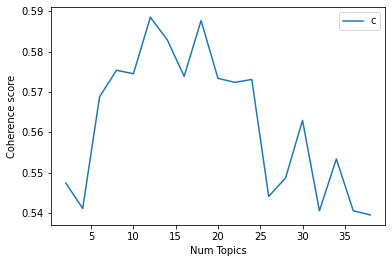

In [33]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5474
Num Topics = 4  has Coherence Value of 0.5411
Num Topics = 6  has Coherence Value of 0.5688
Num Topics = 8  has Coherence Value of 0.5754
Num Topics = 10  has Coherence Value of 0.5745
Num Topics = 12  has Coherence Value of 0.5885
Num Topics = 14  has Coherence Value of 0.5829
Num Topics = 16  has Coherence Value of 0.5739
Num Topics = 18  has Coherence Value of 0.5877
Num Topics = 20  has Coherence Value of 0.5733
Num Topics = 22  has Coherence Value of 0.5724
Num Topics = 24  has Coherence Value of 0.5731
Num Topics = 26  has Coherence Value of 0.5441
Num Topics = 28  has Coherence Value of 0.5487
Num Topics = 30  has Coherence Value of 0.5629
Num Topics = 32  has Coherence Value of 0.5405
Num Topics = 34  has Coherence Value of 0.5534
Num Topics = 36  has Coherence Value of 0.5406
Num Topics = 38  has Coherence Value of 0.5395


In [32]:
#display topics in data frame
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
tm_results = ldamallet[corpus]

In [33]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [34]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [35]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

Topic 1    Topic 2     Topic 3   Topic 4  Topic 5      Topic 6  \
Term1      doctor      carbs         day      diet    drink        sugar   
Term2          ac        low   metformin      keto      eat        blood   
Term3        test        eat        time    weight     rice      insulin   
Term4       month       meal        week  exercise    water      glucose   
Term5   diagnosed       carb      taking       fat    bread         high   
Term6        year         bg     started       lot     food        level   
Term7      number     eating         med      work     meat         body   
Term8      result       hour  medication      food    fruit       normal   
Term9        told       food        feel    eating    sugar        lower   
Term10       type        day      effect      lost   potato      fasting   
Term11        ago      spike          mg   healthy   cheese   resistance   
Term12  diagnosis     number       night      lose      egg        liver   
Term13    fasting       high       month      long      add     diabetic   
Term14    testing    protein       start   calorie  chicken     increase   
Term15     normal       fast     morning      loss      lot     pancreas   
Term16   diabetic    morning      couple    change      cut         cell   
Term17    reading     dinner        long      term   veggie       damage   
Term18      range  breakfast        felt        lb    sweet      problem   
Term19       past        ate     working     pound    pasta  cholesterol   
Term20        med      lunch     feeling   control    small      symptom   

         Topic 7      Topic 8     Topic 9 Topic 10  
Term1       year     diabetes       meter     good  
Term2      ampxb         type       check    thing  
Term3       post       people        time     work  
Term4    problem      disease   insurance    great  
Term5      issue       health       strip     life  
Term6   question           gt     reading     feel  
Term7     advice         read        pain     hard  
Term8        ill      medical       libre     time  
Term9   diabetic     research      sensor   change  
Term10    family        study        foot      bad  
Term11   thought     diabetic         cgm      lot  
Term12      care  information      finger  control  
Term13      long           dr        free     luck  
Term14       eye       person       point     live  
Term15      yeah    treatment        hand      bit  
Term16    answer         risk  difference     idea  
Term17      kind         cure        read     hope  
Term18     heart    condition        info   making  
Term19   symptom         fact       stick   pretty  
Term20      fine        agree   recommend    start

In [36]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-36-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic1   doctor, ac, test, month, diagnosed, year, number, result, told, type, ago, diagnosis, fasting, testing, normal, diabetic, reading, range, past, med                    
Topic2   carbs, low, eat, meal, carb, bg, eating, hour, food, day, spike, number, high, protein, fast, morning, dinner, breakfast, ate, lunch                                   
Topic3   day, metformin, time, week, taking, started, med, medication, feel, effect, mg, night, month, start, morning, couple, long, felt, working, feeling                     
Topic4   diet, keto, weight, exercise, fat, lot, work, food, eating, lost, healthy, lose, long, calorie, loss, change, term, lb, pound, control                                 
Topic5   drink, eat, rice, water, bread, food, meat, fruit, sugar, potato, cheese, egg, add, chicken, lot, cut, veggie, sweet, pasta, small                                     
Topic6   sugar, blood, insulin, glucose, high, level, body, normal, lower, fasting, resistance, liver, diabetic, increase, pancreas, cell, damage, problem, cholesterol, symptom
Topic7   year, ampxb, post, problem, issue, question, advice, ill, diabetic, family, thought, care, long, eye, yeah, answer, kind, heart, symptom, fine                         
Topic8   diabetes, type, people, disease, health, gt, read, medical, research, study, diabetic, information, dr, person, treatment, risk, cure, condition, fact, agree          
Topic9   meter, check, time, insurance, strip, reading, pain, libre, sensor, foot, cgm, finger, free, point, hand, difference, read, info, stick, recommend                     
Topic10  good, thing, work, great, life, feel, hard, time, change, bad, lot, control, luck, live, bit, idea, hope, making, pretty, start

In [41]:
#export list of topics
topics_df.to_csv('diabetes2019_topics.csv', index = False)

In [37]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [38]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [39]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

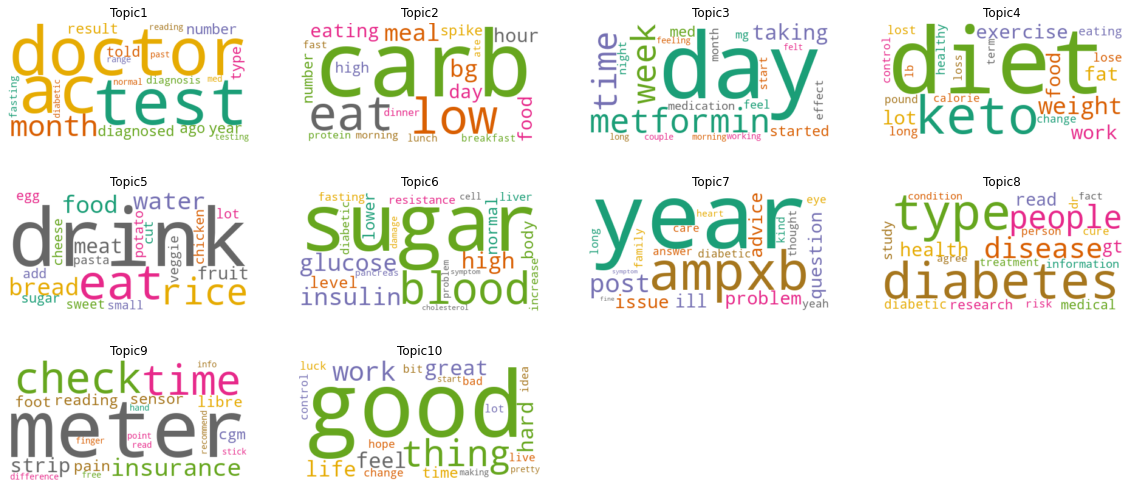

In [40]:
#word cloud
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [42]:
#convert date to datetime variable
diabetes2019["Publish Date"] = pd.to_datetime(diabetes2019['Publish Date'], errors='coerce')
diabetes2019

<ipython-input-42-336865becd87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019["Publish Date"] = pd.to_datetime(diabetes2019['Publish Date'], errors='coerce')


Post ID            Author        Publish Date  \
0      abi6me   buttersmacks     2019-01-01 05:27:00   
1      ed3g2mf  SusanW100        2019-01-02 11:15:00   
2      ed3h251  MiguelTall       2019-01-02 11:27:00   
4      ed2qyr6  ketocultmember   2019-01-02 05:17:00   
6      ed2zhvk  adawah           2019-01-02 07:44:00   
...        ...     ...                           ...   
30004  fcn9uqy  Droseph13        2019-12-31 07:42:00   
30005  fcpfmn1  CursedEarthPizza 2019-12-31 22:57:00   
30006  fcswfr0  forst1tj         2020-01-01 17:00:00   
30007  fcwscpl  alan_s           2020-01-02 23:14:00   
30008  fhzwp97  nerovergil7      2020-02-18 00:40:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry LDN.\n\nAnyone try it with these issues and what was your experience?                                                                                                                                                                                                                                                                                                                                                                                                            
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's. And I managed to to it only in about 3 weeks. I have been diabetic for many years and tried everything, I finally found a program that has finally been a ble to bring down my sugar levels, best of all I am feeling so much better , and my kids have more quality time with me:)  My doctor has cut my my insulin dosage and took me off Metomorfin, he is stunned by this program I am on.  I am very thankful.                                                           
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing I found this program before my body would start to deteriote any more, I have actually been able in just 2 weeks to bring down my numbers from over 210-230 down to 120's-130's. I am amazed that for the first time there is a tool that can detect whoch foods I have to avoid. When there are tools like these to help you get well, my advice to you is to get them ! Don't wait till it's too late diabetes is a deadly disease that can spin out of control too fast.    
4      This big spammy ad isn’t telling anything, either, but it will see the “info.”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
6      That looks about like how my days go. Anytime I can see those 100's makes for a good day.                                                                                                                                                                                                                                                                                                                                                                                                              

In [43]:
#revalue row index
diabetes2019.index = range(28777)
diabetes2019

Post ID            Author        Publish Date  \
0      abi6me   buttersmacks     2019-01-01 05:27:00   
1      ed3g2mf  SusanW100        2019-01-02 11:15:00   
2      ed3h251  MiguelTall       2019-01-02 11:27:00   
3      ed2qyr6  ketocultmember   2019-01-02 05:17:00   
4      ed2zhvk  adawah           2019-01-02 07:44:00   
...        ...     ...                           ...   
28772  fcn9uqy  Droseph13        2019-12-31 07:42:00   
28773  fcpfmn1  CursedEarthPizza 2019-12-31 22:57:00   
28774  fcswfr0  forst1tj         2020-01-01 17:00:00   
28775  fcwscpl  alan_s           2020-01-02 23:14:00   
28776  fhzwp97  nerovergil7      2020-02-18 00:40:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Body  \
0      Keto.\nStressed.\nDiabetic (cannot risk any higher sugars)\nCdiff, crohns.\n\nDoc wants to dry LDN.\n\nAnyone try it with these issues and what was your experience?                                                                                                                                                                                                                                                                                                                                                                                                            
1      I have manged to bring my blood sugar levels to normal range after being all the time over 200's. And I managed to to it only in about 3 weeks. I have been diabetic for many years and tried everything, I finally found a program that has finally been a ble to bring down my sugar levels, best of all I am feeling so much better , and my kids have more quality time with me:)  My doctor has cut my my insulin dosage and took me off Metomorfin, he is stunned by this program I am on.  I am very thankful.                                                           
2      Thanks to Susan here on the board, I have gone on the libre blood sugar program. It's a blessing I found this program before my body would start to deteriote any more, I have actually been able in just 2 weeks to bring down my numbers from over 210-230 down to 120's-130's. I am amazed that for the first time there is a tool that can detect whoch foods I have to avoid. When there are tools like these to help you get well, my advice to you is to get them ! Don't wait till it's too late diabetes is a deadly disease that can spin out of control too fast.    
3      This big spammy ad isn’t telling anything, either, but it will see the “info.”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
4      That looks about like how my days go. Anytime I can see those 100's makes for a good day.                                                                                                                                                                                                                                                                                                                                                                                                              

In [44]:
#find weight of each topic per row
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7
topic_weights2019 = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
topic_weights2019.columns = ['Topic ' + str(i) for i in range(1,11)]
topic_weights2019

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.105820  0.104056  0.109347  0.095238  0.086420  0.102293  0.121693   
1      0.098765  0.064472  0.159122  0.093278  0.061728  0.175583  0.094650   
2      0.093496  0.093496  0.112466  0.071816  0.067751  0.112466  0.105691   
3      0.090909  0.090909  0.090909  0.090909  0.094949  0.090909  0.090909   
4      0.090909  0.101010  0.115152  0.109091  0.094949  0.096970  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
28772  0.072702  0.083676  0.233196  0.087791  0.079561  0.090535  0.078189   
28773  0.097531  0.083951  0.198765  0.076543  0.148148  0.128395  0.064198   
28774  0.100529  0.086420  0.125220  0.098765  0.082892  0.086420  0.107584   
28775  0.107046  0.132791  0.126016  0.127371  0.062331  0.088076  0.136856   
28776  0.100629  0.100629  0.132075  0.094340  0.094340  0.100629  0.094340   

        Topic 8   Topic 9  Topic 10  
0      0.105820  0.089947  0.079365  
1      0.065844  0.100137  0.086420  
2      0.109756  0.136856  0.096206  
3      0.145455  0.113131  0.101010  
4      0.090909  0.092929  0.117172  
...         ...       ...       ...  
28772  0.086420  0.067215  0.120713  
28773  0.066667  0.061728  0.074074  
28774  0.093474  0.126984  0.091711  
28775  0.084011  0.065041  0.070461  
28776  0.094340  0.094340  0.094340  

[28777 rows x 10 columns]

In [47]:
#find topics per month / year
#topic_weights2018['month'] = diabetes2018["Publish Date"].dt.month
#topic_weights2018['year'] = diabetes2018["Publish Date"].dt.year
topic_weights2019['month_year'] = pd.to_datetime(diabetes2019['Publish Date']).dt.to_period('M')
topic_weights2019

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.105820  0.104056  0.109347  0.095238  0.086420  0.102293  0.121693   
1      0.098765  0.064472  0.159122  0.093278  0.061728  0.175583  0.094650   
2      0.093496  0.093496  0.112466  0.071816  0.067751  0.112466  0.105691   
3      0.090909  0.090909  0.090909  0.090909  0.094949  0.090909  0.090909   
4      0.090909  0.101010  0.115152  0.109091  0.094949  0.096970  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
28772  0.072702  0.083676  0.233196  0.087791  0.079561  0.090535  0.078189   
28773  0.097531  0.083951  0.198765  0.076543  0.148148  0.128395  0.064198   
28774  0.100529  0.086420  0.125220  0.098765  0.082892  0.086420  0.107584   
28775  0.107046  0.132791  0.126016  0.127371  0.062331  0.088076  0.136856   
28776  0.100629  0.100629  0.132075  0.094340  0.094340  0.100629  0.094340   

        Topic 8   Topic 9  Topic 10 month_year  
0      0.105820  0.089947  0.079365  2019-01    
1      0.065844  0.100137  0.086420  2019-01    
2      0.109756  0.136856  0.096206  2019-01    
3      0.145455  0.113131  0.101010  2019-01    
4      0.090909  0.092929  0.117172  2019-01    
...         ...       ...       ...      ...    
28772  0.086420  0.067215  0.120713  2019-12    
28773  0.066667  0.061728  0.074074  2019-12    
28774  0.093474  0.126984  0.091711  2020-01    
28775  0.084011  0.065041  0.070461  2020-01    
28776  0.094340  0.094340  0.094340  2020-02    

[28777 rows x 11 columns]

In [48]:
#find dominant topic of the record
topic_weights2019['Dominant'] = topic_weights2019.drop('month_year', axis=1).idxmax(axis=1)
topic_weights2019

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.105820  0.104056  0.109347  0.095238  0.086420  0.102293  0.121693   
1      0.098765  0.064472  0.159122  0.093278  0.061728  0.175583  0.094650   
2      0.093496  0.093496  0.112466  0.071816  0.067751  0.112466  0.105691   
3      0.090909  0.090909  0.090909  0.090909  0.094949  0.090909  0.090909   
4      0.090909  0.101010  0.115152  0.109091  0.094949  0.096970  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
28772  0.072702  0.083676  0.233196  0.087791  0.079561  0.090535  0.078189   
28773  0.097531  0.083951  0.198765  0.076543  0.148148  0.128395  0.064198   
28774  0.100529  0.086420  0.125220  0.098765  0.082892  0.086420  0.107584   
28775  0.107046  0.132791  0.126016  0.127371  0.062331  0.088076  0.136856   
28776  0.100629  0.100629  0.132075  0.094340  0.094340  0.100629  0.094340   

        Topic 8   Topic 9  Topic 10 month_year  Dominant  
0      0.105820  0.089947  0.079365  2019-01    Topic 7   
1      0.065844  0.100137  0.086420  2019-01    Topic 6   
2      0.109756  0.136856  0.096206  2019-01    Topic 9   
3      0.145455  0.113131  0.101010  2019-01    Topic 8   
4      0.090909  0.092929  0.117172  2019-01    Topic 10  
...         ...       ...       ...      ...         ...  
28772  0.086420  0.067215  0.120713  2019-12    Topic 3   
28773  0.066667  0.061728  0.074074  2019-12    Topic 3   
28774  0.093474  0.126984  0.091711  2020-01    Topic 9   
28775  0.084011  0.065041  0.070461  2020-01    Topic 7   
28776  0.094340  0.094340  0.094340  2020-02    Topic 3   

[28777 rows x 12 columns]

In [49]:
#extract topic weighting
topic_weights2019.to_csv('topic_weight2019.csv', index = False)

In [50]:
#percentage of dominant topics per a month
topic_dominant2019 = topic_weights2019.groupby('month_year')['Dominant'].value_counts(normalize=True).unstack()
topic_dominant2019

Dominant     Topic 1  Topic 10   Topic 2   Topic 3   Topic 4   Topic 5  \
month_year                                                               
2019-01     0.105033  0.106674  0.080416  0.100109  0.057987  0.116521   
2019-02     0.121474  0.092812  0.092357  0.087807  0.080983  0.120109   
2019-03     0.107234  0.093191  0.099574  0.082979  0.077447  0.157021   
2019-04     0.111368  0.084566  0.113216  0.092421  0.077172  0.153420   
2019-05     0.117194  0.100973  0.090024  0.095296  0.091241  0.127332   
2019-06     0.122418  0.107398  0.099887  0.083740  0.072099  0.138941   
2019-07     0.123422  0.116090  0.076578  0.106721  0.093279  0.129939   
2019-08     0.115280  0.099033  0.098259  0.100580  0.100193  0.127273   
2019-09     0.129826  0.094595  0.088803  0.096042  0.105212  0.125483   
2019-10     0.130236  0.108669  0.109498  0.094981  0.089589  0.098714   
2019-11     0.139501  0.112702  0.098018  0.092878  0.066814  0.101322   
2019-12     0.116555  0.097996  0.099480  0.081292  0.091685  0.132146   
2020-01     0.068376  0.085470  0.128205  0.145299  0.068376  0.059829   
2020-02     0.054054  0.135135  0.054054  0.189189  0.135135  0.081081   
2020-03     0.500000 NaN       NaN        0.250000  0.250000 NaN         
2020-04     0.111111 NaN       NaN        0.111111  0.222222  0.333333   

Dominant     Topic 6   Topic 7   Topic 8   Topic 9  
month_year                                          
2019-01     0.102298  0.079869  0.130197  0.120897  
2019-02     0.090992  0.111010  0.114195  0.088262  
2019-03     0.091064  0.083830  0.129362  0.078298  
2019-04     0.079482  0.073937  0.112754  0.101664  
2019-05     0.080292  0.093674  0.082725  0.121249  
2019-06     0.078858  0.089748  0.105520  0.101389  
2019-07     0.074542  0.081059  0.101426  0.096945  
2019-08     0.076983  0.086654  0.102901  0.092843  
2019-09     0.085425  0.100386  0.091699  0.082529  
2019-10     0.088760  0.074658  0.095811  0.109083  
2019-11     0.068282  0.128855  0.091410  0.100220  
2019-12     0.089087  0.083148  0.101336  0.107275  
2020-01     0.111111  0.102564  0.094017  0.136752  
2020-02     0.243243  0.027027  0.027027  0.054054  
2020-03    NaN       NaN       NaN       NaN        
2020-04     0.111111 NaN       NaN        0.111111

In [51]:
#dominant topic by year
topic_dominant2019['Dominant'] = topic_dominant2019.idxmax(axis=1)
topic_dominant2019

Dominant     Topic 1  Topic 10   Topic 2   Topic 3   Topic 4   Topic 5  \
month_year                                                               
2019-01     0.105033  0.106674  0.080416  0.100109  0.057987  0.116521   
2019-02     0.121474  0.092812  0.092357  0.087807  0.080983  0.120109   
2019-03     0.107234  0.093191  0.099574  0.082979  0.077447  0.157021   
2019-04     0.111368  0.084566  0.113216  0.092421  0.077172  0.153420   
2019-05     0.117194  0.100973  0.090024  0.095296  0.091241  0.127332   
2019-06     0.122418  0.107398  0.099887  0.083740  0.072099  0.138941   
2019-07     0.123422  0.116090  0.076578  0.106721  0.093279  0.129939   
2019-08     0.115280  0.099033  0.098259  0.100580  0.100193  0.127273   
2019-09     0.129826  0.094595  0.088803  0.096042  0.105212  0.125483   
2019-10     0.130236  0.108669  0.109498  0.094981  0.089589  0.098714   
2019-11     0.139501  0.112702  0.098018  0.092878  0.066814  0.101322   
2019-12     0.116555  0.097996  0.099480  0.081292  0.091685  0.132146   
2020-01     0.068376  0.085470  0.128205  0.145299  0.068376  0.059829   
2020-02     0.054054  0.135135  0.054054  0.189189  0.135135  0.081081   
2020-03     0.500000 NaN       NaN        0.250000  0.250000 NaN         
2020-04     0.111111 NaN       NaN        0.111111  0.222222  0.333333   

Dominant     Topic 6   Topic 7   Topic 8   Topic 9 Dominant  
month_year                                                   
2019-01     0.102298  0.079869  0.130197  0.120897  Topic 8  
2019-02     0.090992  0.111010  0.114195  0.088262  Topic 1  
2019-03     0.091064  0.083830  0.129362  0.078298  Topic 5  
2019-04     0.079482  0.073937  0.112754  0.101664  Topic 5  
2019-05     0.080292  0.093674  0.082725  0.121249  Topic 5  
2019-06     0.078858  0.089748  0.105520  0.101389  Topic 5  
2019-07     0.074542  0.081059  0.101426  0.096945  Topic 5  
2019-08     0.076983  0.086654  0.102901  0.092843  Topic 5  
2019-09     0.085425  0.100386  0.091699  0.082529  Topic 1  
2019-10     0.088760  0.074658  0.095811  0.109083  Topic 1  
2019-11     0.068282  0.128855  0.091410  0.100220  Topic 1  
2019-12     0.089087  0.083148  0.101336  0.107275  Topic 5  
2020-01     0.111111  0.102564  0.094017  0.136752  Topic 3  
2020-02     0.243243  0.027027  0.027027  0.054054  Topic 6  
2020-03    NaN       NaN       NaN       NaN        Topic 1  
2020-04     0.111111 NaN       NaN        0.111111  Topic 5

In [52]:
topic_dominant2019.to_csv('topic_dominant2019.csv', index = False)

In [53]:
#merge dataframes together
diabetes2019['Dominant'] = topic_weights2019['Dominant']
diabetes2019['month_year'] = topic_weights2019['month_year']
diabetes2019.tail()

<ipython-input-53-2086c26f8aa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['Dominant'] = topic_weights2019['Dominant']
<ipython-input-53-2086c26f8aa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2019['month_year'] = topic_weights2019['month_year']


Post ID            Author        Publish Date  \
28772  fcn9uqy  Droseph13        2019-12-31 07:42:00   
28773  fcpfmn1  CursedEarthPizza 2019-12-31 22:57:00   
28774  fcswfr0  forst1tj         2020-01-01 17:00:00   
28775  fcwscpl  alan_s           2020-01-02 23:14:00   
28776  fhzwp97  nerovergil7      2020-02-18 00:40:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Body  \
28772  Both I cant sleep when my sugar is too high, and lack of sleep causes my numbers to be higher then they are. Also my boss's wife is super into natural medicine; long story short she forced me to start taking magnesium tablets before I went to bed and they actually work. I go from being tired physically and unable to sleep to not realizing that I feel asleep pretty quickly.                                                                                                                 
28773  I think it starts with high sugar levels.  I was slamming multiple fountain drinks and cans of coke a day for years.  I always had trouble falling asleep, which I assumed was the caffeine. \n\nAfter being diagnosed Type 2 about two weeks ago, I immediately quit regular coke, and switched to Diet which actually has more caffeine than regular.  I now fall asleep faster, and stay asleep much longer without random wake ups.  For me at least, it definitely starts with the sugar levels.   
28774  My Dr. put me on Rybelsus about 2 mo ago.  It’s basically a pill version of Ozempic..the side effects have been much less/non existent.  May be worth a thought.                                                                                                                                                                                                                                                                                                                                        
28775  The sleep problem is probably related to your high levels but those are more likely related to your diet than your insomnia, although insomnia is not helping.\n\n&gt;I take trulicity once a week\n\nThat is an aid to an appropriate way of eating but not compensation for a bad diet.\n\nWhen do you test related to your meals and what numbers do you see at those times?\n\nWhat dietary regimen in terms of carbs, fat and protein per meal or per day do you follow?                           
28776  try fasting at night, then sleep.                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

                                                                                                                                                                                                                                                                                                                                               text_gens_nonstop  \
28772  Both I sleep sugar high, lack sleep causes numbers higher are. Also boss's wife super natural medicine; long story short forced start taking magnesium tablets I went bed actually work. I tired physically unable sleep realizing I feel asleep pretty quickly.                                                                          

In [54]:
#export dataframe
diabetes2019.to_csv('diabetes2019_lda.csv', index = False)